# 1. Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np #NumPy can be used to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data preprocessing

## 1.Data Collection: 

In [2]:
data=pd.read_excel(r"C:\Users\mdine\Downloads\Survey_Salary Expectations.xlsx")

In [3]:
data

,Name,Age,Gender,Graduation (UG / PG),Area of Expertise / Proficiency,Experience,Marital Status,Address (Please mention city name),Aspiring Job Role (Choose one from the below options),Have you changed your domain?,Reason for changing domain.,Attendance Percentage in the Course,"Grand In the Course(T1,T2,T3 and T4)",What upskilling course did you pursue?,Salary Expectation (Post Completion of Certification / Upskilling)
0,Harikrishna,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
1,Harikrishna,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
2,Dinesh,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
3,Dinesh,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
4,Jeeva S,25 years,Male,Masters in Business Administration,Accounts,0 Years,Single,Bengaluru,Data analyst,Yes,Interest in other domain,93,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Amit,34,Male,Bachelors in Technology,Civil,1,Married,Kolkata,Investment Banking,No,Not changed I am in my domain,99,T1,Certified Investment Banking Operations Profes...,"7,00,000 to 10,00,000"
636,Suman,28,Female,Bachelors of Engineering,Data Science,3,Single,Pune,Data Analyst,No,Not changed I am in my domain,96,T4,Postgraduate Program in Machine Learning And A...,No Placement
637,Ekta,21,Female,Masters in Business Administration,Maths,4,Married,Bengaluru,AI Engineer,Yes,Salary,92,T3,Certified Investment Banking Operations Profes...,"3,50,000 to 4,50,000"
638,Shalini,27,Female,M.Sc. in Computer Science,Computer,1,Married,Hyderabad,Investment Banking,No,Not changed I am in my domain,86,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


## 2.Data Inspection:

**Explore the dataset to understand its structure, size, and the types of data it contains. Check for missing values and anomalies.**

In [4]:
data.shape #shape of the 640 rows and 15 columns 

(640, 15)

In [5]:
data.info() #check information about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Name                                                                640 non-null    object
 1   Age                                                                 640 non-null    object
 2   Gender                                                              639 non-null    object
 3   Graduation (UG / PG)                                                640 non-null    object
 4   Area of Expertise / Proficiency                                     639 non-null    object
 5   Experience                                                          640 non-null    object
 6   Marital Status                                                      640 non-null    object
 7   Address (Please mention ci

### You have a dataset with 14 categorical features and 1 numeric feature.

In [6]:
data.columns #columns checking 

Index(['Name', 'Age', 'Gender', 'Graduation (UG / PG)',
       'Area of Expertise / Proficiency ', 'Experience', 'Marital Status',
       'Address (Please mention city name)',
       'Aspiring Job Role (Choose one from the below options)',
       'Have you changed your domain? ', 'Reason for changing domain.',
       'Attendance Percentage in the Course ',
       'Grand In the Course(T1,T2,T3 and T4)',
       'What upskilling course did you pursue?',
       'Salary Expectation (Post Completion of Certification / Upskilling)'],
      dtype='object')

**You want to rename the columns in your dataset to make them more concise and understandable.**

In [7]:
data.rename(columns = {"Graduation (UG / PG)":"Graduation",'Area of Expertise / Proficiency ':'Proficiency',
                       'Address (Please mention city name)':'City','Aspiring Job Role (Choose one from the below options)':'AspiringJobRole',
                       'Have you changed your domain? ':'SameDomain','Reason for changing domain.':'whyChangedDomain',
                       'What upskilling course did you pursue?':'UpskillingCourse','Marital Status':'MaritalStatus','Grand In the Course(T1,T2,T3 and T4)':'Grand',
                       'Salary Expectation (Post Completion of Certification / Upskilling)':'SalaryExpectation','Attendance Percentage in the Course ':'Attendance'},inplace = True)

In [8]:
data.head() #top 5 rows

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
0,Harikrishna,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
1,Harikrishna,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
2,Dinesh,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
3,Dinesh,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
4,Jeeva S,25 years,Male,Masters in Business Administration,Accounts,0 Years,Single,Bengaluru,Data analyst,Yes,Interest in other domain,93,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


In [9]:
data.tail() #lower 5 rows

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
635,Amit,34,Male,Bachelors in Technology,Civil,1,Married,Kolkata,Investment Banking,No,Not changed I am in my domain,99,T1,Certified Investment Banking Operations Profes...,"7,00,000 to 10,00,000"
636,Suman,28,Female,Bachelors of Engineering,Data Science,3,Single,Pune,Data Analyst,No,Not changed I am in my domain,96,T4,Postgraduate Program in Machine Learning And A...,No Placement
637,Ekta,21,Female,Masters in Business Administration,Maths,4,Married,Bengaluru,AI Engineer,Yes,Salary,92,T3,Certified Investment Banking Operations Profes...,"3,50,000 to 4,50,000"
638,Shalini,27,Female,M.Sc. in Computer Science,Computer,1,Married,Hyderabad,Investment Banking,No,Not changed I am in my domain,86,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
639,kalim_khan,25 years,Male,Bachelors of Engineering,civil engineering,1 years,Single,Bengaluru,Data Engineer,Yes,Salary,80,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


## 3.Data Cleaning:

**Remove duplicates, if any. Correct inconsistent or erroneous data. Handle outliers if necessary.**

In [10]:
data.duplicated().sum()

2

In [11]:
data[data.duplicated()]

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
1,Harikrishna,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
3,Dinesh,24 years,Male,Bachelors in Technology,Computer Science,0 Years,Single,Bengaluru,Data scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

**Your data does not contain any duplicate values.**

## 4.Handling Missing Data:

**Remove or fill missing values using techniques like mean, median, or mode imputation.**
**Use domain knowledge to decide on the best approach for handling missing data.**

In [14]:
data.isnull().sum()

Name                 0
Age                  0
Gender               1
Graduation           0
Proficiency          1
Experience           0
MaritalStatus        0
City                 0
AspiringJobRole      0
SameDomain           1
whyChangedDomain     1
Attendance           0
Grand                0
UpskillingCourse     0
SalaryExpectation    0
dtype: int64

<Axes: >

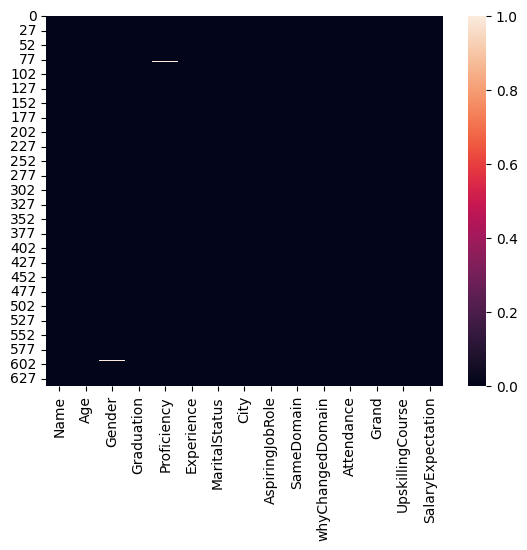

In [15]:
sns.heatmap(data.isnull())

In [16]:
data[(data.Gender.isna())] #showing the null value 

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
596,Arjun,21,NaN,Bachelor of Geography,Mechanical,4,Married,Hyderabad,Machine Engineer,Yes,Career Progression,94,T1,Postgraduate Program in Machine Learning And A...,"7,00,000 to 10,00,000"


### imputing

**Filling null values in a dataset is often referred to as "imputing" missing data. Imputing involves replacing or filling in missing values with estimated or calculated values, typically based on the available data and specific imputation techniques.**

In [17]:
data.Gender.mode()[0] # here you can It shows Female but Arjun is male.

'Female'

In [18]:
data['Gender'].fillna('Male', inplace=True) # I filled male .

In [19]:
data.isna().sum()

Name                 0
Age                  0
Gender               0
Graduation           0
Proficiency          1
Experience           0
MaritalStatus        0
City                 0
AspiringJobRole      0
SameDomain           1
whyChangedDomain     1
Attendance           0
Grand                0
UpskillingCourse     0
SalaryExpectation    0
dtype: int64

In [20]:
data[(data.SameDomain.isna())]

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
433,Vinita,33,Female,Commerce and Management (B.Com / B.B.A),Business,0,Divorced,Bengaluru,Banking,NaN,Not changed I am in my domain,97,T1,Postgraduate Financial Analysis Program,"7,00,000 to 10,00,000"


In [21]:
data.SameDomain.mode()[0]

'Yes'

In [22]:
data['SameDomain'].fillna('Yes', inplace=True)

In [23]:
data.isna().sum()

Name                 0
Age                  0
Gender               0
Graduation           0
Proficiency          1
Experience           0
MaritalStatus        0
City                 0
AspiringJobRole      0
SameDomain           0
whyChangedDomain     1
Attendance           0
Grand                0
UpskillingCourse     0
SalaryExpectation    0
dtype: int64

In [24]:
data[(data.Proficiency.isna())]

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
80,Hema,20 years,Female,Commerce and Management (B.Com / B.B.A),NaN,0 years,Single,Bengaluru,Investment Banking Associate,No,Not changed I am in my domain,87,T2,Certified Investment Banking Operations Profes...,"4,50,000 to 7,00,000"


In [25]:
data.Proficiency.mode()[0]

'Accounts'

In [26]:
data['Proficiency'].fillna('Accounts', inplace=True)

In [27]:
data.isna().sum()

Name                 0
Age                  0
Gender               0
Graduation           0
Proficiency          0
Experience           0
MaritalStatus        0
City                 0
AspiringJobRole      0
SameDomain           0
whyChangedDomain     1
Attendance           0
Grand                0
UpskillingCourse     0
SalaryExpectation    0
dtype: int64

In [28]:
data[(data.whyChangedDomain.isna())]

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
631,Gaurav,23,Male,MSc in Chemistry,Finance,2,Married,Bengaluru,Investment Banking,Yes,NaN,81,T1,Certified Investment Banking Operations Profes...,"7,00,000 to 10,00,000"


In [29]:
data.whyChangedDomain.unique()

array(['Not changed I am in my domain', 'Interest in other domain',
       'Salary', 'Career Progression', 'Company Culture',
       'Career Progresslon', 'career progression',
       'Interest in oteer domain', 'carrier progression ',
       'Interest in Other Domain', nan], dtype=object)

In [30]:
data.whyChangedDomain.mode()[0]

'Not changed I am in my domain'

In [31]:
data['whyChangedDomain'].fillna('Not changed I am in my domain', inplace=True)

In [32]:
data.isna().sum()

Name                 0
Age                  0
Gender               0
Graduation           0
Proficiency          0
Experience           0
MaritalStatus        0
City                 0
AspiringJobRole      0
SameDomain           0
whyChangedDomain     0
Attendance           0
Grand                0
UpskillingCourse     0
SalaryExpectation    0
dtype: int64

**I have successfully removed all null values from your data through the cleaning process.**

## 5.data analysis

In [33]:
data.columns

Index(['Name', 'Age', 'Gender', 'Graduation', 'Proficiency', 'Experience',
       'MaritalStatus', 'City', 'AspiringJobRole', 'SameDomain',
       'whyChangedDomain', 'Attendance', 'Grand', 'UpskillingCourse',
       'SalaryExpectation'],
      dtype='object')

## Age column Analysis

In [34]:
data.Age.value_counts() # some rows has "Years" I need to remove

20           40
24           36
35           35
26           34
28           34
31           33
30           32
33           32
32           30
25           29
22           28
34           28
23           28
27           28
21           28
29           25
26 years     21
23 years     19
24 years     19
22 years     18
25 years     15
29 years     11
30 years      8
28 years      7
21 years      7
27 years      7
32 years      2
31 years      2
35 years      1
20 years      1
Name: Age, dtype: int64

In [35]:
# Remove "years" from the "Age" column
data['Age']=data['Age'].astype(str).str.replace(' years', '')
data['Age'] = data['Age'].astype(int)
data.Age.value_counts()

24    55
26    55
23    47
22    46
25    44
28    41
20    41
30    40
29    36
35    36
27    35
21    35
31    35
32    32
33    32
34    28
Name: Age, dtype: int64

**Age column is clearned**

## Gender column Analysis

In [36]:
data.Gender.value_counts() #Uper and lower case problem

Male      300
Female    299
male       34
male        5
Name: Gender, dtype: int64

In [37]:
data['Gender'].str.lower().str.strip().str.capitalize().unique()

array(['Male', 'Female'], dtype=object)

In [38]:
data['Gender']=data['Gender'].str.lower().str.strip().str.capitalize()
data.Gender.value_counts()

Male      339
Female    299
Name: Gender, dtype: int64

**Gender column is clearned**

## Graduation Column Analysis

In [39]:
data.Graduation.value_counts()

Masters in Business Administration                     91
Commerce and Management (B.Com / B.B.A)                76
Bachelor's of computer applications                    72
Bachelors of Engineering                               71
Bachelors in Technology                                69
Bachelor of Geography                                  64
M.Sc. in Computer Science                              53
Bachelor of Arts                                       47
MSc in Chemistry                                       43
Any other Masters Degree (M.Com / M.A / M.Phil etc)    10
Arts and science                                        5
Bsc computer science                                    5
bachleors of engineering                                4
M.Sc. (In computer science)                             2
Bed english                                             2
Bachelor of Geography                                   2
MSc in chemistry                                        2
Bsc mathematic

## clustering the Graduation column

In [40]:
Graduation=data.Graduation.value_counts()
Graduation_less10=Graduation[Graduation<=10]
 
def handle_Graduation(value):
    if(value in Graduation_less10):
        return 'others'
    else:
        return value

In [41]:
data['Graduation']=data['Graduation'].apply(handle_Graduation) # assigned
data['Graduation'].value_counts()

Masters in Business Administration         91
Commerce and Management (B.Com / B.B.A)    76
Bachelor's of computer applications        72
Bachelors of Engineering                   71
Bachelors in Technology                    69
Bachelor of Geography                      64
M.Sc. in Computer Science                  53
others                                     52
Bachelor of Arts                           47
MSc in Chemistry                           43
Name: Graduation, dtype: int64

**Graduation has cleaned**

## Proficiency Column Analysis

In [42]:
data.Proficiency.value_counts()

Accounts                                 61
Chemistry                                53
Business                                 50
Computer                                 45
Data Science                             42
Maths                                    41
Web Development                          38
Computer Science                         37
Statistics                               37
Physics                                  36
Civil                                    36
ECE                                      33
Mechanical                               32
Accounts                                 15
Finance and accounts                     15
Civil Engineering                        14
Teaching                                 13
Electrical and Electronic Engineering     7
Computer science                          4
Mechanical                                3
mechanical                                3
Mathematics                               2
Computer science                

## Cleaning and clustering the Proficiency column

In [43]:
# Define a dictionary for mapping similar values
mapping = {
    'Civil': 'Civil Engineering',
    'civil engineering': 'Civil Engineering',
    'Civil Engineering': 'Civil Engineering'
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [44]:
# Define a dictionary for mapping similar values
mapping = {
    'Computer': 'Computer Science',
    'Computer science and engineering': 'Computer Science',
    'Computer science ': 'Computer Science',
    'Computer science':'Computer Science'
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [45]:
# Define a dictionary for mapping similar values
mapping = {
    'Accounts': 'Accounts',
    'Accounts  ': 'Accounts',
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [46]:
# Define a dictionary for mapping similar values
mapping = {
    'Maths': 'Mathematics',
    'Mathematics ': 'Mathematics',
     'Maths': 'Mathematics',
    'maths':'Mathematics'
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [47]:
# Define a dictionary for mapping similar values
mapping = {
    'Physics': 'Physics',
    'physics ': 'Physics'   
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [48]:
# Define a dictionary for mapping similar values
mapping = {
    'ECE': 'Electrical and Electronic Engineering',
    'Electrical and Electronic Engineering ': 'Electrical and Electronic Engineering'
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [49]:
# Define a dictionary for mapping similar values
mapping = {
    'Mechanical': 'Mechanical Engineering',
    'MECHANICAL ENGINEERING': 'Mechanical Engineering',
     'Mechanical': 'Mechanical Engineering',
    'mechanical':'Mechanical Engineering',
    'Mechanical engineering': 'Mechanical Engineering',
    'Mechanical ':'Mechanical Engineering',
    'Mechanical engineering ':'Mechanical Engineering',
    'mechanical ':'Mechanical Engineering'
    
}
data['Proficiency']=data['Proficiency'].replace(mapping)

In [50]:
Proficiency=data.Proficiency.value_counts()
Proficiency_less10=Proficiency[Proficiency<=10]
 
def handle_Proficiency(value):
    if(value in Proficiency_less10):
        return 'others'
    else:
        return value

data['Proficiency']=data['Proficiency'].apply(handle_Proficiency) # assigned
data['Proficiency'].value_counts()

Computer Science                         89
Accounts                                 76
Chemistry                                53
Civil Engineering                        51
Business                                 50
Mathematics                              44
Mechanical Engineering                   42
Data Science                             42
Electrical and Electronic Engineering    40
Web Development                          38
Physics                                  37
Statistics                               37
Finance and accounts                     15
Teaching                                 13
others                                   11
Name: Proficiency, dtype: int64

**Proficiency column has clearned.**

## Experience column Analysis

In [51]:
data.Experience.value_counts() #Year is there

1          87
0          87
2          86
3          82
5          80
4          78
0 years    61
1 years    34
0 Years    27
2 Years    13
2 years     3
Name: Experience, dtype: int64

In [52]:
data['Experience']=data['Experience'].astype(str).str.replace(' years', '')
data['Experience']=data['Experience'].astype(str).str.replace(' Years', '')
data['Experience'] = data['Experience'].astype(int)

data['Experience'].value_counts()

0    175
1    121
2    102
3     82
5     80
4     78
Name: Experience, dtype: int64

**Experience column has cleaned**

## MaritalStatus Column Analysis

In [53]:
data.MaritalStatus.value_counts()

Single      245
Divorced    179
Married     173
single       22
married      17
Single        1
married       1
Name: MaritalStatus, dtype: int64

In [54]:
data['MaritalStatus'].str.lower().str.strip().str.capitalize().unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [55]:
data['MaritalStatus']=data['MaritalStatus'].str.lower().str.strip().str.capitalize()
data.MaritalStatus.value_counts()

Single      268
Married     191
Divorced    179
Name: MaritalStatus, dtype: int64

**MaritalStatus columns has clearned**

## City Column Analysis

In [56]:
data.City.value_counts()

Bengaluru    218
Kolkata       97
Mumbai        94
Hyderabad     85
Pune          73
Chennai       71
Name: City, dtype: int64

## AspiringJobRole column Analysis

In [57]:
data.AspiringJobRole.value_counts()

Data Engineer                            88
Investment Banking                       76
Data Analyst                             75
AI Engineer                              75
Data Scientist                           74
Banking                                  67
Machine Engineer                         62
Investment Banking Associate             39
Data analyst                             31
Data scientist                           20
Anti-Money Laundering(AML) Specialist     5
Account Manager                           5
Business Analyst                          5
Financial Analyst                         3
data analyst                              2
data scientist                            2
Assosciate Analyst                        1
Data analyat                              1
Data analydt                              1
Uchleorslesi  Maiyacof                    1
Data analytt                              1
Data analyht                              1
YstersBusiness idn Made Business

## Cleaning and clustering the AspiringJobRole column

In [58]:
# Define a dictionary for mapping similar values
mapping = {
    'Data Analyst': 'Data Analyst',
    'Data analyst': 'Data Analyst',
     'data analyst': 'Data Analyst',
    'Data analyat':'Data Analyst',
    'Data analydt': 'Data Analyst',
    'Uchleorslesi  Maiyacof':'Data Analyst',
    'Data analytt':'Data Analyst',
    'Data analyht':'Data Analyst',
    'Assosciate Analyst ':'Data Analyst'
    
}
data['AspiringJobRole']=data['AspiringJobRole'].replace(mapping)

In [59]:
# Define a dictionary for mapping similar values
mapping = {
    'Data Scientist': 'Data Scientist',
    'Data scientist': 'Data Scientist',
     'data scientist': 'Data Scientist',
    'Data scientist':'Data Scientist',
    'Data scientist ': 'Data Scientist',
    'data science ':'Data Scientist',
    'data scientist ':'Data Scientist'
    
}
data['AspiringJobRole']=data['AspiringJobRole'].replace(mapping)

In [60]:
# Define a dictionary for mapping similar values
mapping = {
    'Machine Engineer': 'ML Enineer'
}
data['AspiringJobRole']=data['AspiringJobRole'].replace(mapping)

In [61]:
AspiringJobRole=data.AspiringJobRole.value_counts()
AspiringJobRole_less10=AspiringJobRole[AspiringJobRole<=10]
 
def handle_AspiringJobRole(value):
    if(value in AspiringJobRole_less10):
        return 'others'
    else:
        return value
    
data['AspiringJobRole']=data['AspiringJobRole'].apply(handle_AspiringJobRole) # assigned
data['AspiringJobRole'].value_counts()

Data Analyst                    114
Data Scientist                   98
Data Engineer                    88
Investment Banking               76
AI Engineer                      75
Banking                          67
ML Enineer                       62
Investment Banking Associate     39
others                           19
Name: AspiringJobRole, dtype: int64

**AspiringJobRole column has clearned**

## SameDomain column Analysis

In [62]:
data['SameDomain'].value_counts()

Yes     326
No      288
yes      18
yes       4
No        2
Name: SameDomain, dtype: int64

In [63]:
data['SameDomain'].str.lower().str.strip().str.capitalize().unique()

array(['No', 'Yes'], dtype=object)

In [64]:
data['SameDomain']=data['SameDomain'].str.lower().str.strip().str.capitalize()
data.SameDomain.value_counts()

Yes    348
No     290
Name: SameDomain, dtype: int64

**SameDomain column has clarned**

## whyChangedDomain column Analysis

In [65]:
data.whyChangedDomain.value_counts()

Not changed I am in my domain    288
Career Progression               151
Salary                            87
Interest in Other Domain          83
Interest in other domain          20
Career Progresslon                 4
career progression                 2
Company Culture                    1
Interest in oteer domain           1
carrier progression                1
Name: whyChangedDomain, dtype: int64

In [66]:
# Define a dictionary for mapping similar values
mapping = {
    'Career Progression': 'Career Progression',
    'Career Progresslon': 'Career Progression',
    'career progression': 'Career Progression',
    'carrier progression ':'Career Progression',
    'Career Progresslon':'Career Progression',
    'career progression':'Career Progression',
    'carrier progression ':'Career Progression'
    
}
data['whyChangedDomain']=data['whyChangedDomain'].replace(mapping)

In [67]:
# Define a dictionary for mapping similar values
mapping = {
    'Interest in Other Domain': 'Interest in Other Domain',
    'Interest in other domain': 'Interest in Other Domain',
    'Interest in oteer domain': 'Interest in Other Domain'
}
data['whyChangedDomain']=data['whyChangedDomain'].replace(mapping)

In [68]:
data.whyChangedDomain.value_counts()

Not changed I am in my domain    288
Career Progression               158
Interest in Other Domain         104
Salary                            87
Company Culture                    1
Name: whyChangedDomain, dtype: int64

**whyChangedDomain column has clearned**

## Attendance column Analysis

In [69]:
data.Attendance.value_counts()

80     64
85     43
83     39
95     35
88     34
98     33
87     33
92     32
96     32
97     30
89     28
100    28
82     26
91     25
84     24
86     24
99     23
81     23
94     23
90     23
93     16
Name: Attendance, dtype: int64

## Grand Column Analysis

In [70]:
data.Grand.value_counts()

T2    249
T3    141
T4    125
T1    123
Name: Grand, dtype: int64

## UpskillingCourse Column Analysis

In [71]:
data.UpskillingCourse.value_counts()

Postgraduate Program in Data Science and Analytics                      155
Certified Investment Banking Operations Professional                    151
Postgraduate Financial Analysis Program                                  93
Full Stack Developer Pro                                                 88
Postgraduate Program in Machine Learning And Artificial Intelligence     84
Postgraduate Program in Cybersecurity                                    66
certified Investment Banking Operations Professional                      1
Name: UpskillingCourse, dtype: int64

In [72]:
# Define a dictionary for mapping similar values
mapping = {
    'Certified Investment Banking Operations Professional': 'Certified Investment Banking Operations Professional',
    'certified Investment Banking Operations Professional': 'Certified Investment Banking Operations Professional'
}
data['UpskillingCourse']=data['UpskillingCourse'].replace(mapping)

In [73]:
data.UpskillingCourse.value_counts()

Postgraduate Program in Data Science and Analytics                      155
Certified Investment Banking Operations Professional                    152
Postgraduate Financial Analysis Program                                  93
Full Stack Developer Pro                                                 88
Postgraduate Program in Machine Learning And Artificial Intelligence     84
Postgraduate Program in Cybersecurity                                    66
Name: UpskillingCourse, dtype: int64

**UpskillingCourse column has clearned.**

## SalaryExpectation column Analysis

In [74]:
data.SalaryExpectation.value_counts()

4,50,000 to 7,00,000      252
7,00,000 to 10,00,000     127
No Placement              125
3,50,000 to 4,50,000      105
10,00,000 to 15,00,000     29
Name: SalaryExpectation, dtype: int64

## Significant data cleaning has been performed on the dataset.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 639
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               638 non-null    object
 1   Age                638 non-null    int32 
 2   Gender             638 non-null    object
 3   Graduation         638 non-null    object
 4   Proficiency        638 non-null    object
 5   Experience         638 non-null    int32 
 6   MaritalStatus      638 non-null    object
 7   City               638 non-null    object
 8   AspiringJobRole    638 non-null    object
 9   SameDomain         638 non-null    object
 10  whyChangedDomain   638 non-null    object
 11  Attendance         638 non-null    int64 
 12  Grand              638 non-null    object
 13  UpskillingCourse   638 non-null    object
 14  SalaryExpectation  638 non-null    object
dtypes: int32(2), int64(1), object(12)
memory usage: 74.8+ KB


### I have a dataset with 12 categorical features and 3 numeric feature.

## 6.Data Visualization:

In [76]:
data.head()

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
0,Harikrishna,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
2,Dinesh,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
4,Jeeva S,25,Male,Masters in Business Administration,Accounts,0,Single,Bengaluru,Data Analyst,Yes,Interest in Other Domain,93,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
5,Meghana,22,Female,Bachelors of Engineering,Civil Engineering,0,Single,Bengaluru,others,Yes,Salary,92,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
6,Iftekhar Ahmed Khan,23,Male,Bachelors of Engineering,Mechanical Engineering,0,Single,Bengaluru,Data Engineer,Yes,Career Progression,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


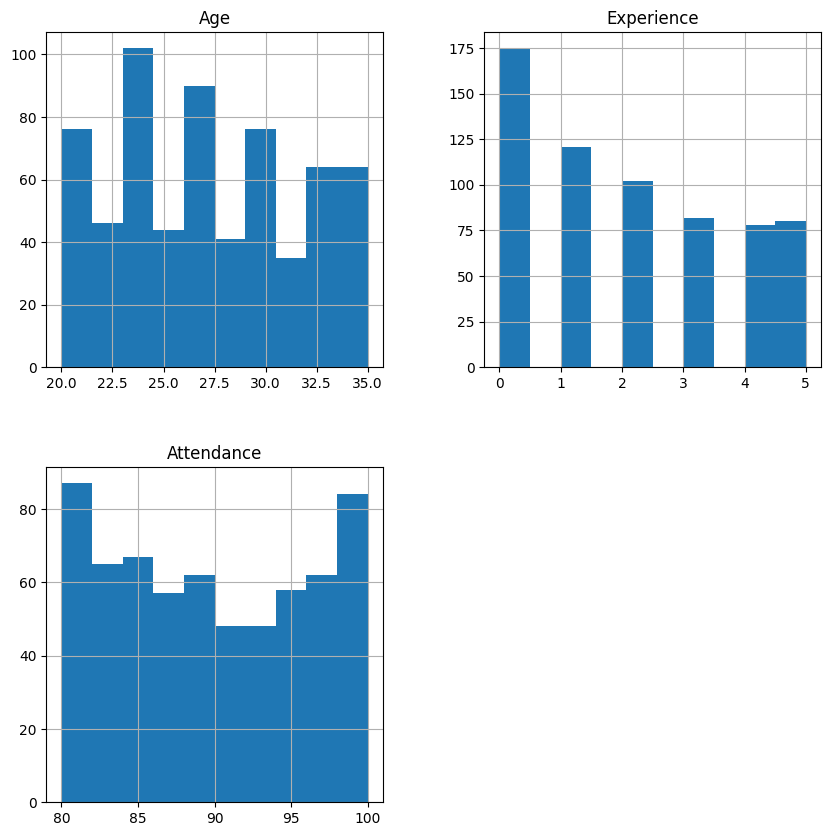

In [77]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))
plt.show()

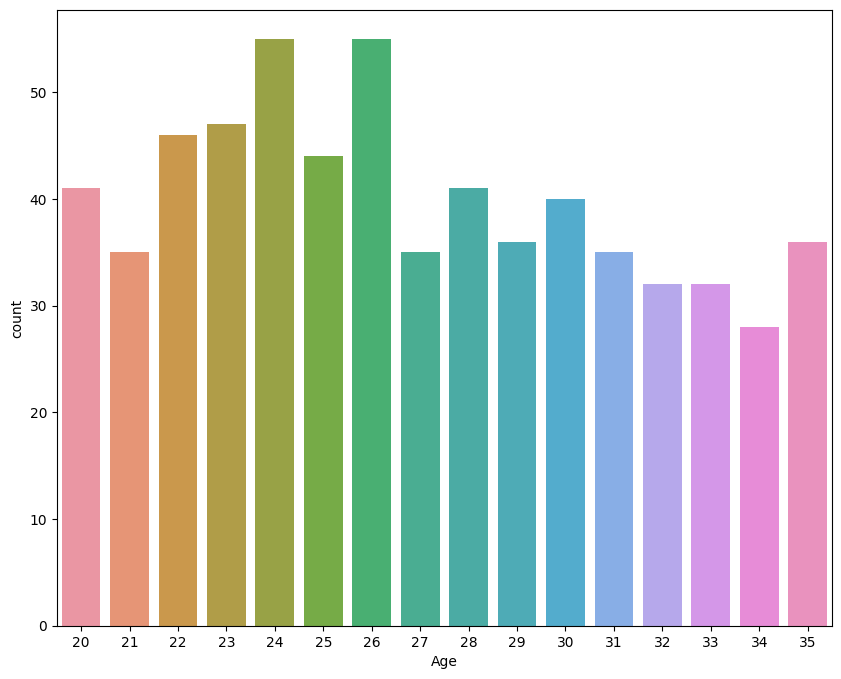

In [78]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=data,x='Age')

**In Imarticus, there is a higher number of people in the 24 and 25 age group.**

<Axes: xlabel='Gender', ylabel='count'>

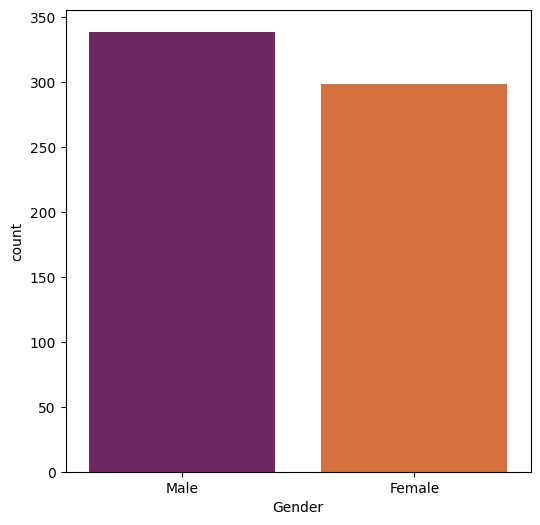

In [79]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='Gender', palette = 'inferno')

**In Imarticus, there are more males compared to females.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bachelors in Technology'),
  Text(1, 0, 'Masters in Business Administration'),
  Text(2, 0, 'Bachelors of Engineering'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Commerce and Management (B.Com / B.B.A)'),
  Text(5, 0, 'M.Sc. in Computer Science'),
  Text(6, 0, 'Bachelor of Geography'),
  Text(7, 0, "Bachelor's of computer applications"),
  Text(8, 0, 'MSc in Chemistry'),
  Text(9, 0, 'Bachelor of Arts')])

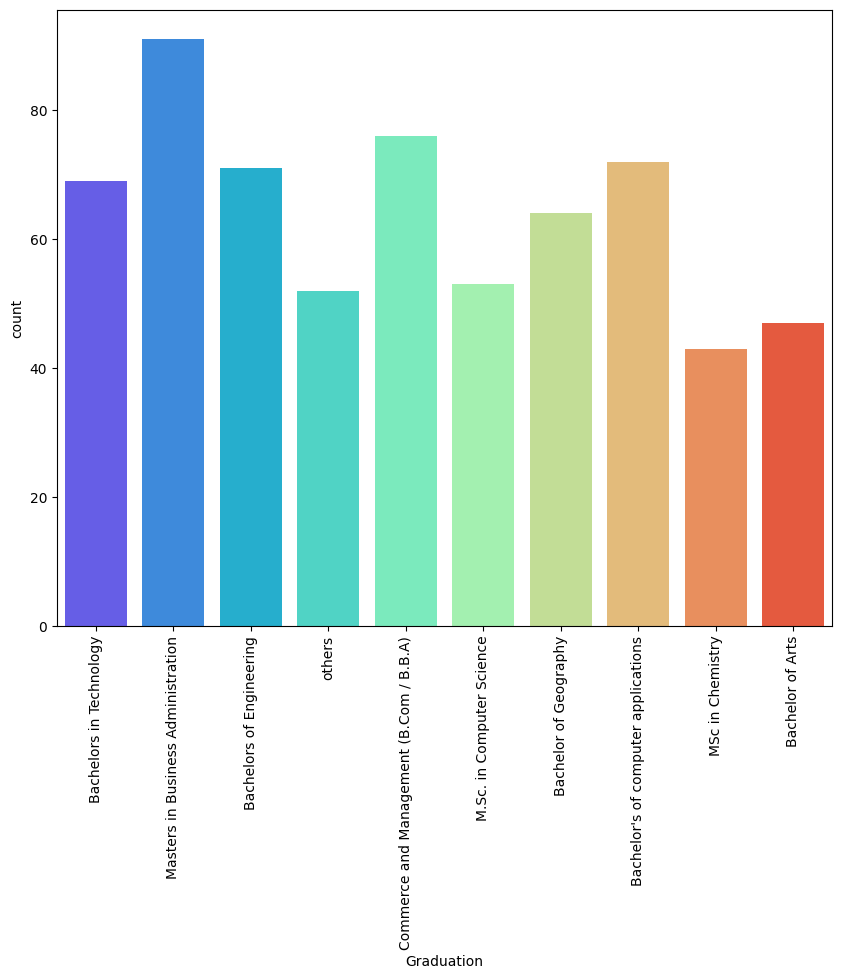

In [80]:
plt.figure(figsize = (10,8))
sns.countplot(data=data,x='Graduation', palette = 'rainbow')
plt.xticks(rotation=90)

**At Imarticus, a higher number of students come from a Master's in Business Administration (MBA) background as compared to those pursuing a Master of Science (MSc) in Chemistry.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Computer Science'),
  Text(1, 0, 'Accounts'),
  Text(2, 0, 'Civil Engineering'),
  Text(3, 0, 'Mechanical Engineering'),
  Text(4, 0, 'Mathematics'),
  Text(5, 0, 'others'),
  Text(6, 0, 'Electrical and Electronic Engineering'),
  Text(7, 0, 'Physics'),
  Text(8, 0, 'Finance and accounts '),
  Text(9, 0, 'Teaching'),
  Text(10, 0, 'Business'),
  Text(11, 0, 'Statistics'),
  Text(12, 0, 'Chemistry'),
  Text(13, 0, 'Data Science'),
  Text(14, 0, 'Web Development')])

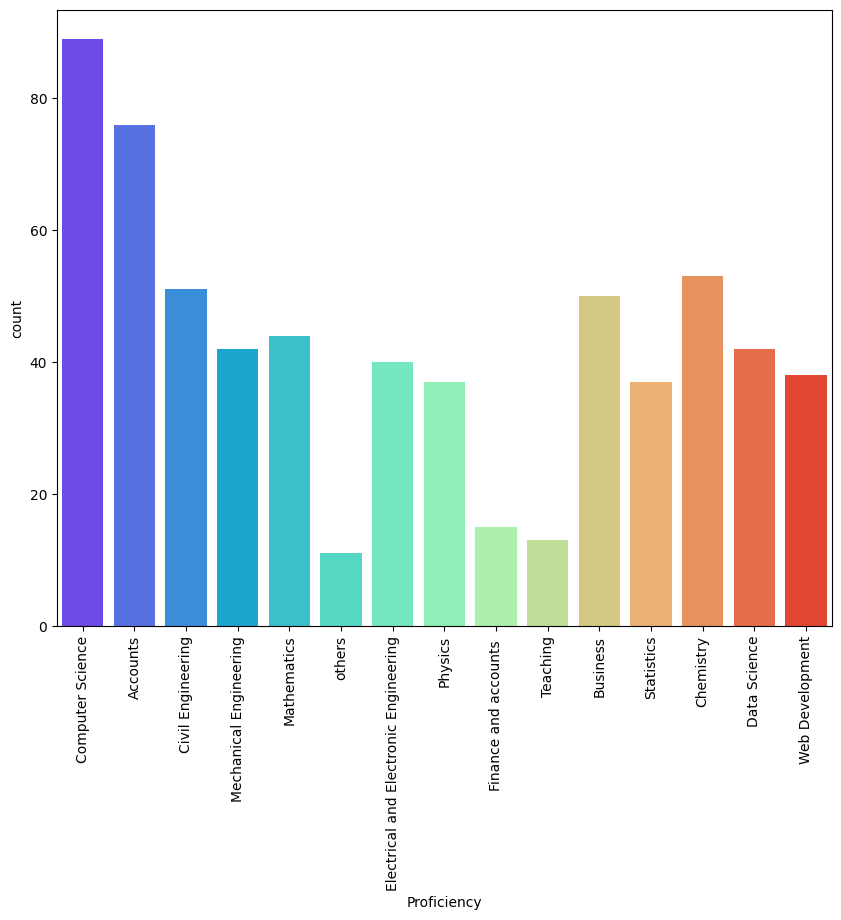

In [81]:
plt.figure(figsize = (10,8))
sns.countplot(data=data,x='Proficiency', palette = 'rainbow')
plt.xticks(rotation=90)

**At Imarticus, a larger number of students have a proficiency in Computer Science, whereas the number of students with proficiency in Teaching is lower.**

<Axes: xlabel='Experience', ylabel='count'>

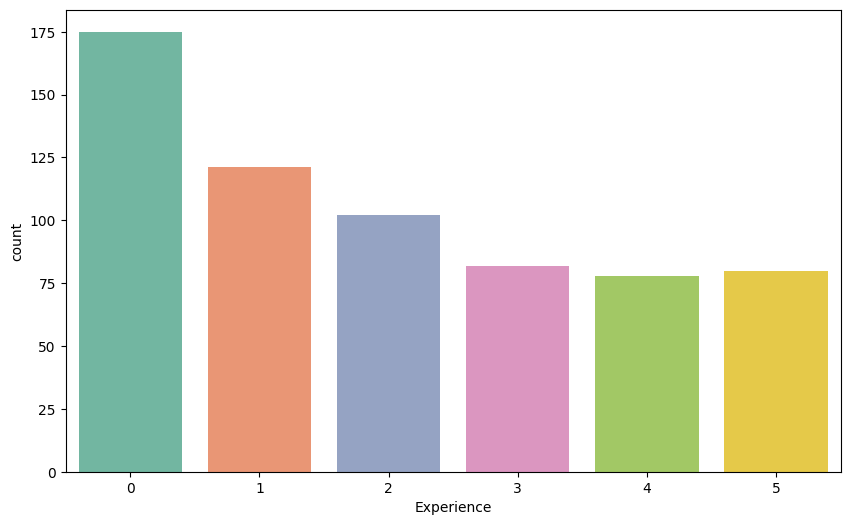

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Experience', palette ="Set2" )

**In Imarticus, there are more students who are freshers, and there are fewer students with 5 years of experience.**

<Axes: xlabel='MaritalStatus', ylabel='count'>

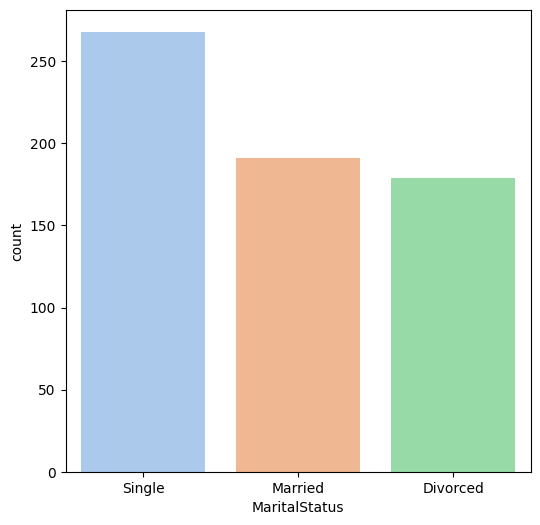

In [83]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='MaritalStatus', palette ="pastel" )

**In Imarticus, the number of single individuals is higher compared to those who are married or divorced.**

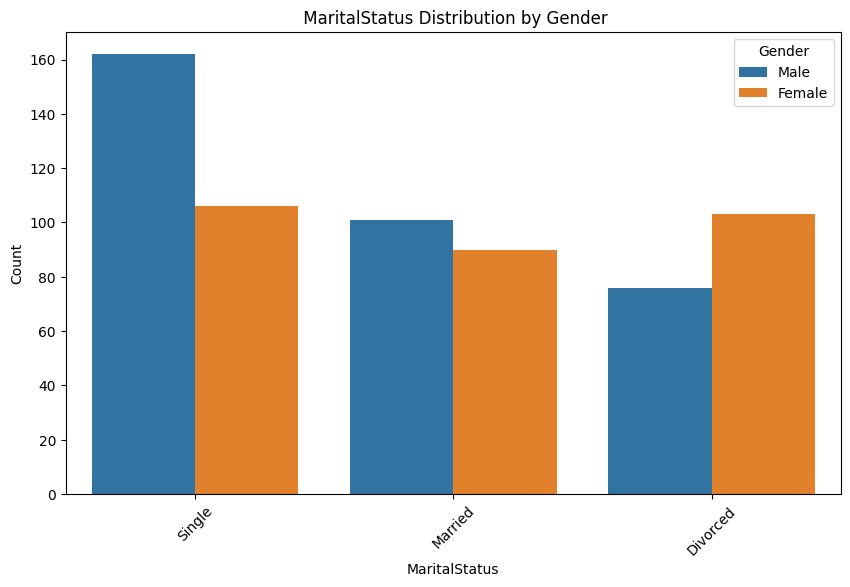

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MaritalStatus', hue='Gender')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title(' MaritalStatus Distribution by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

**In Imarticus, there are more single males, while there are more single and divorced females.**

<Axes: xlabel='City', ylabel='count'>

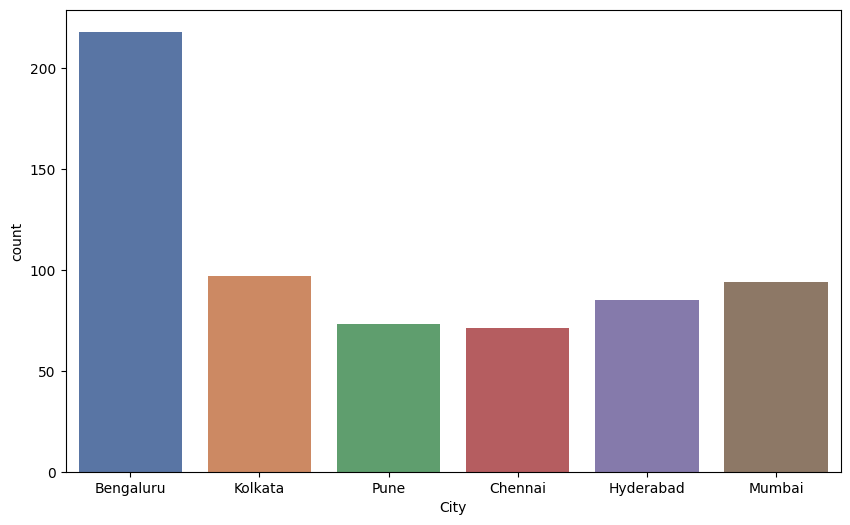

In [85]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='City', palette ="deep" )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Data Analyst'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Data Engineer'),
  Text(4, 0, 'Investment Banking Associate'),
  Text(5, 0, 'Banking'),
  Text(6, 0, 'Investment Banking'),
  Text(7, 0, 'AI Engineer'),
  Text(8, 0, 'ML Enineer')])

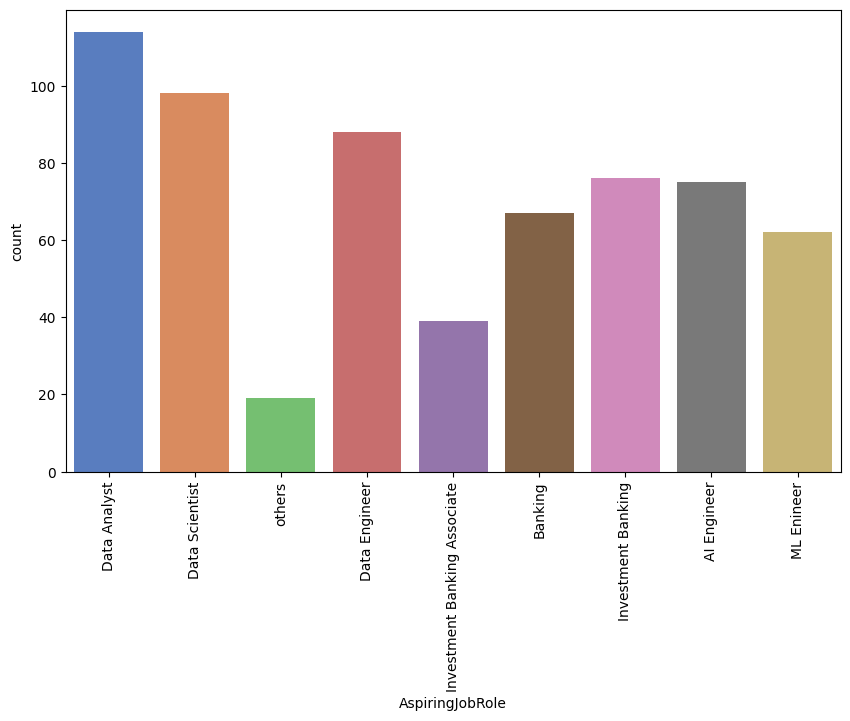

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='AspiringJobRole', palette ="muted" )
plt.xticks(rotation=90)

**In Imarticus, a larger number of students are interested in pursuing roles as Data Analysts, while only a few students are interested in roles as Investment Banking Associates.**

<Axes: xlabel='SameDomain', ylabel='count'>

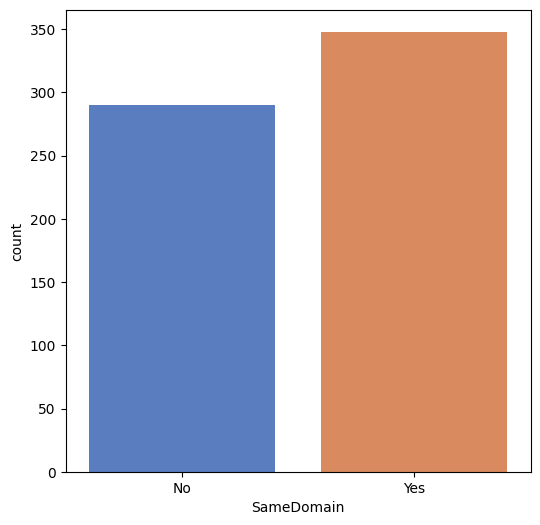

In [87]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='SameDomain', palette ="muted" )

**In Imarticus, a significant number of students come from a similar background and have enrolled in courses related to their background or field of study.**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Not changed I am in my domain'),
  Text(1, 0, 'Interest in Other Domain'),
  Text(2, 0, 'Salary'),
  Text(3, 0, 'Career Progression'),
  Text(4, 0, 'Company Culture')])

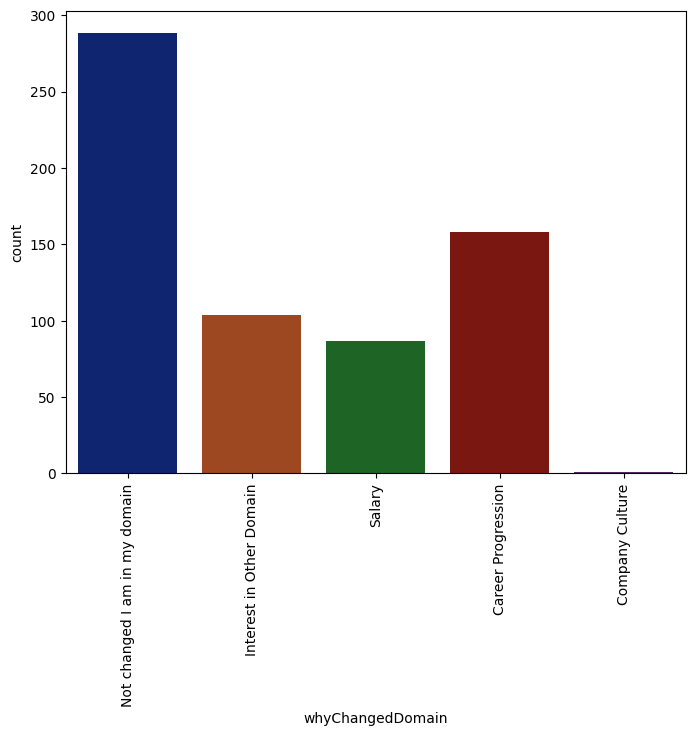

In [88]:
plt.figure(figsize = (8,6))
sns.countplot(data=data,x='whyChangedDomain', palette ="dark" )
plt.xticks(rotation=90)

**In Imarticus, a majority of students are enrolling in courses within their existing domain, but there are a few students who have changed their domain, primarily with the aim of career progression.**

<Axes: xlabel='Attendance', ylabel='count'>

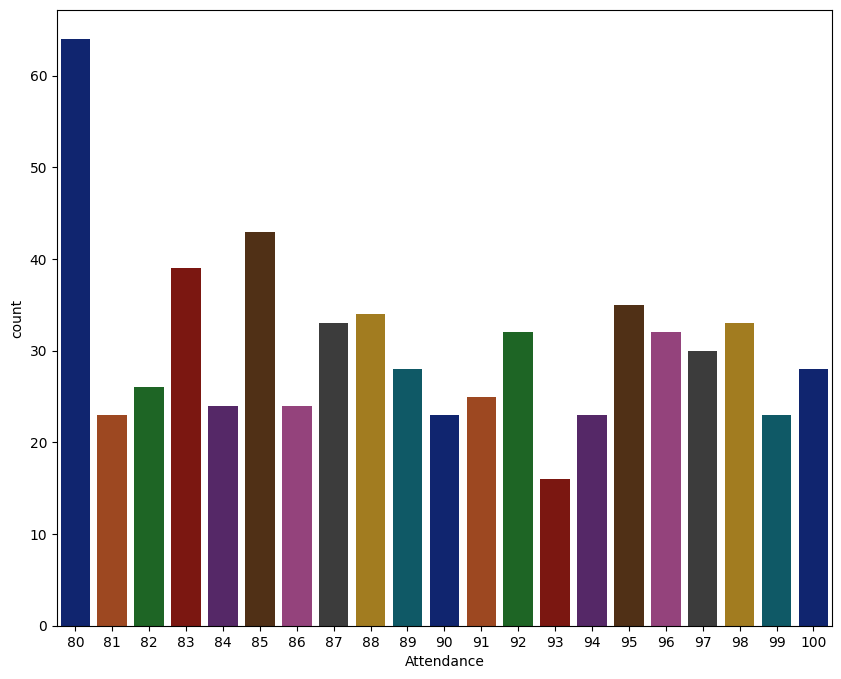

In [89]:
plt.figure(figsize = (10,8))
sns.countplot(data=data,x='Attendance', palette ="dark" )

<Axes: xlabel='Grand', ylabel='count'>

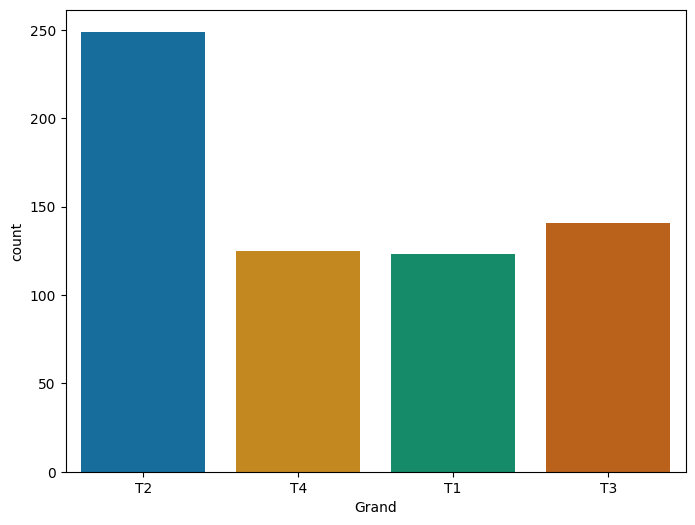

In [90]:
plt.figure(figsize = (8,6))
sns.countplot(data=data,x='Grand', palette ="colorblind" )

**In Imarticus, the majority of students receive a T2 grade, while only a few students receive a T1 grade.**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Postgraduate Program in Data Science and Analytics'),
  Text(1, 0, 'Postgraduate Financial Analysis Program'),
  Text(2, 0, 'Postgraduate Program in Machine Learning And Artificial Intelligence'),
  Text(3, 0, 'Certified Investment Banking Operations Professional'),
  Text(4, 0, 'Full Stack Developer Pro'),
  Text(5, 0, 'Postgraduate Program in Cybersecurity')])

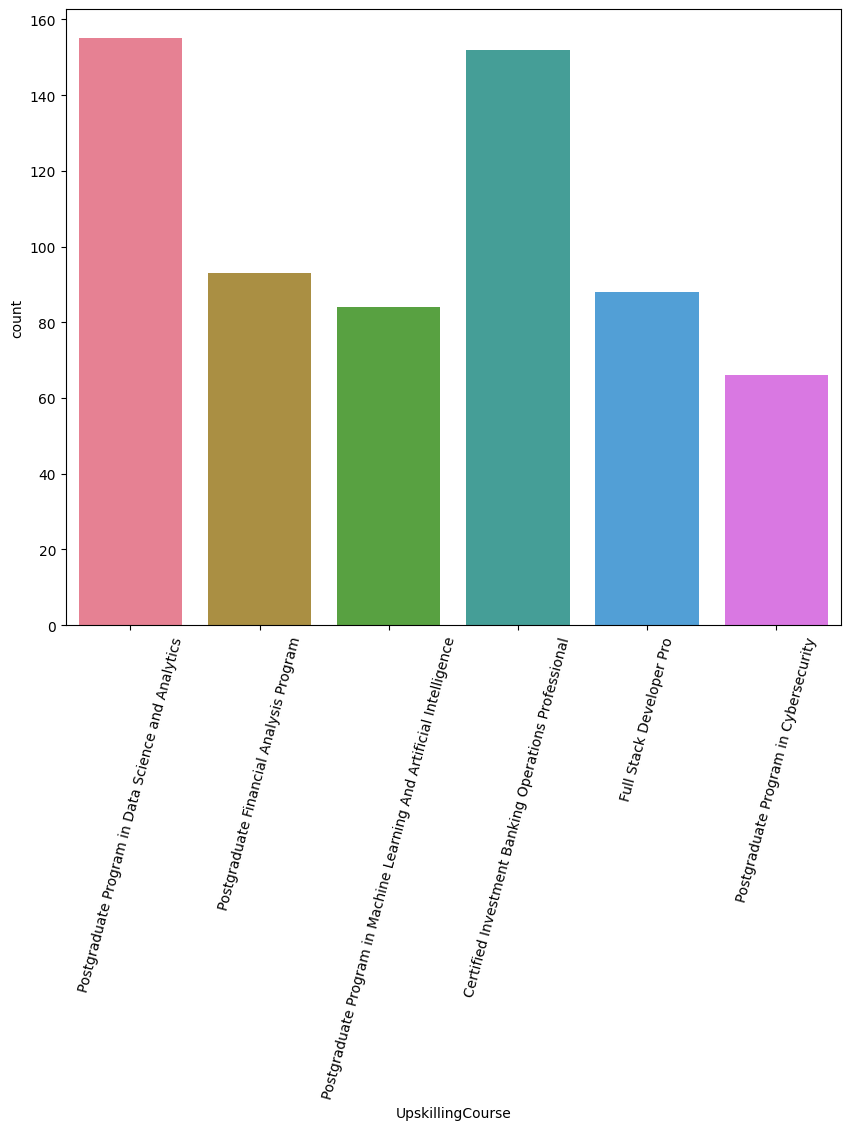

In [91]:
plt.figure(figsize = (10,8))
sns.countplot(data=data,x='UpskillingCourse', palette ="husl" )
plt.xticks(rotation=75)

**In Imarticus, a larger number of students enroll in the Post Graduate Diploma in Accounting (PGDA) and Investment Banking courses compared to other available courses.**

<Axes: xlabel='SalaryExpectation', ylabel='count'>

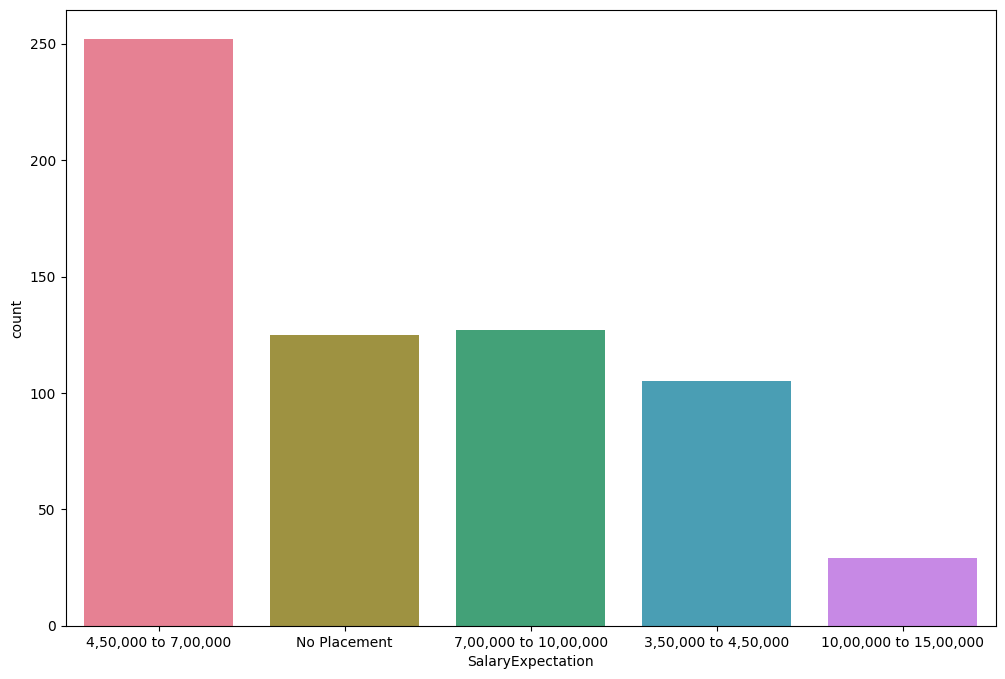

In [92]:
plt.figure(figsize = (12,8))
sns.countplot(data=data,x='SalaryExpectation', palette ="husl" )

**In Imarticus, the majority of students expect a salary range of 4.5 to 7 lakhs, while only a small number of students expect a higher salary range of 10 to 15 lakhs, which is often based on their level of experience.**

## Count of Gender

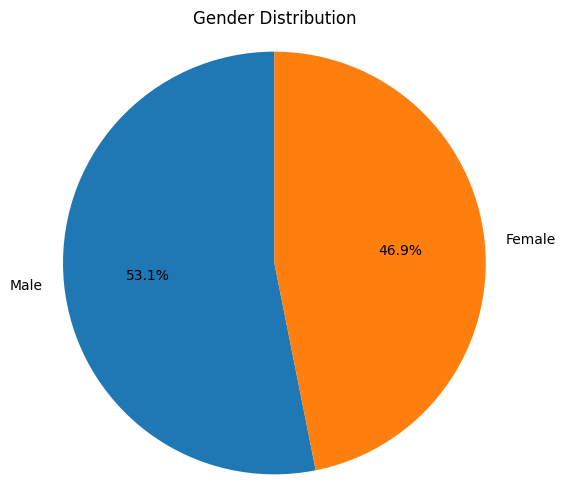

In [93]:
# Count of genders
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



## Count of marital status

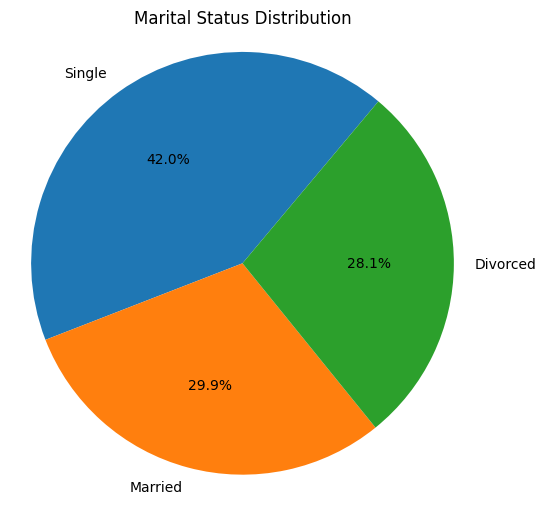

In [94]:

# Count of marital status
marital_status_counts = data['MaritalStatus'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

## Create a function to generate and display a pie chart
## Create pie charts for different columns

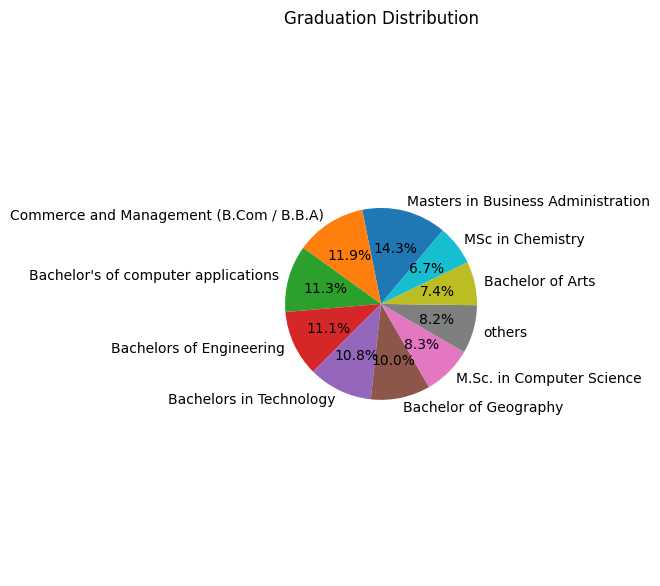

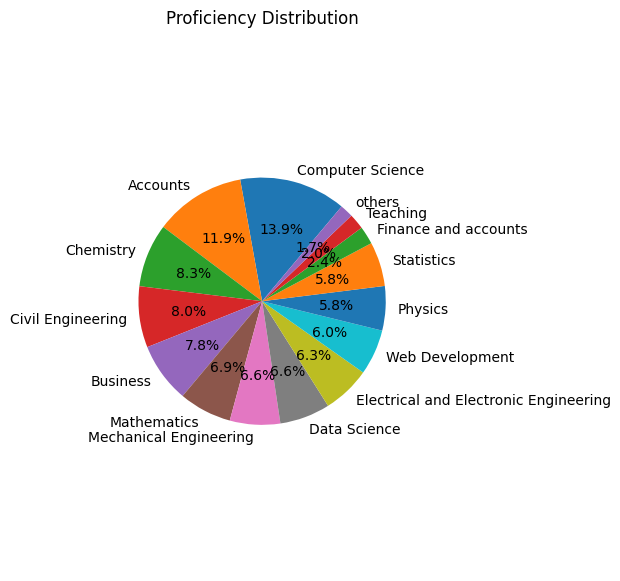

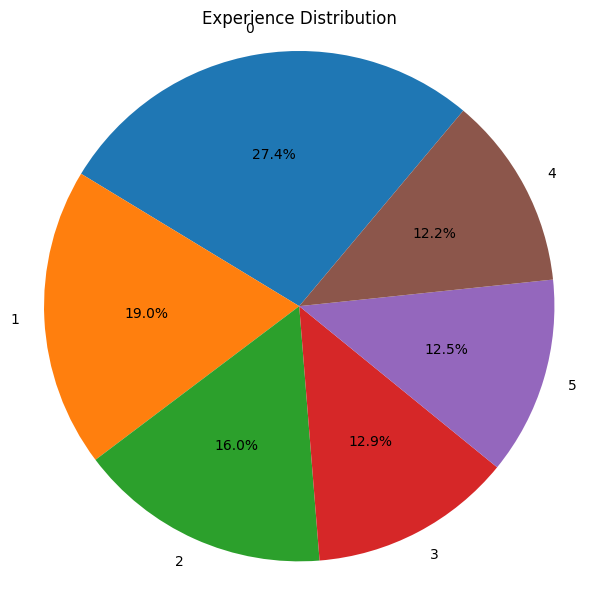

In [95]:

# Create a function to generate and display a pie chart
def plot_pie(column_name):
    column_counts = data[column_name].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=50)
    plt.title(f'{column_name} Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Create pie charts for different columns
plot_pie('Graduation')
plot_pie('Proficiency')
plot_pie('Experience')


## Scatter Plot - Age vs. Salary Expectation:

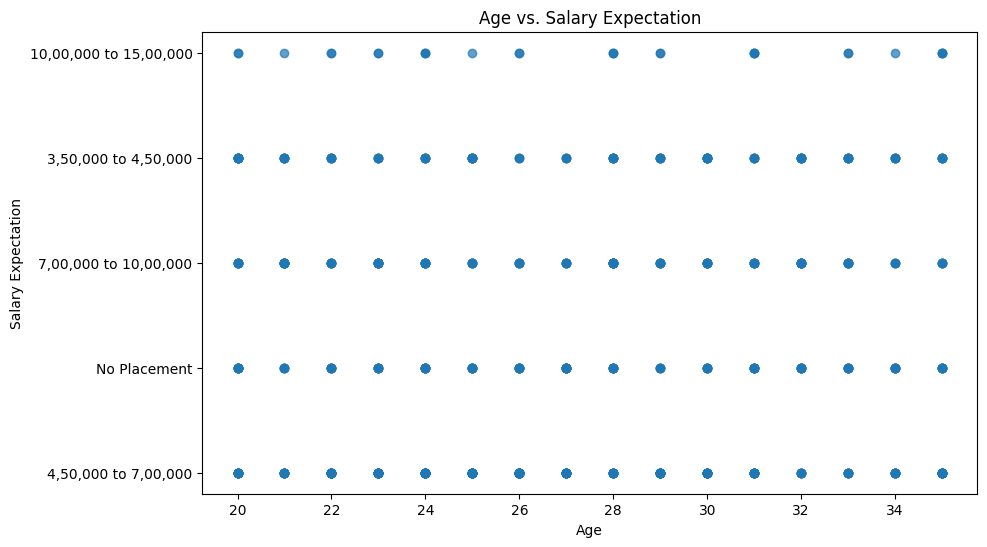

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['SalaryExpectation'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Salary Expectation')
plt.title('Age vs. Salary Expectation')
plt.show()

## Aspiring Job Distribution by Gender

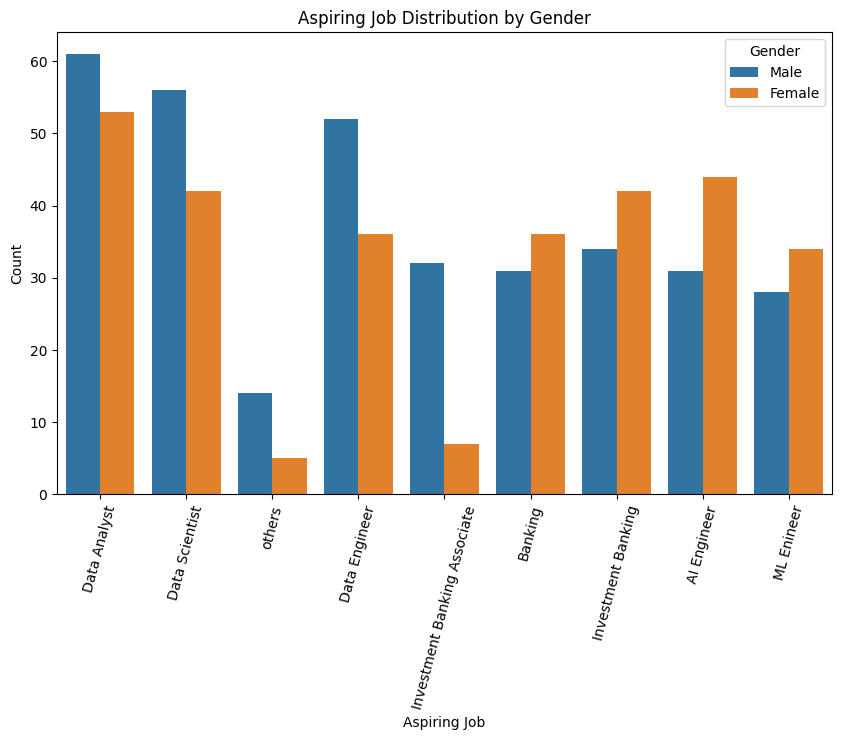

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AspiringJobRole', hue='Gender')
plt.xlabel('Aspiring Job')
plt.ylabel('Count')
plt.title('Aspiring Job Distribution by Gender')
plt.xticks(rotation=75)
plt.legend(title='Gender')
plt.show()

**job In Imarticus, a significant number of both male and female candidates aspire to pursue a career as Data Analysts, while there are very few female candidates interested in the role of Investment Banking Associate.**

## SalaryExpectation Distribution by Gender

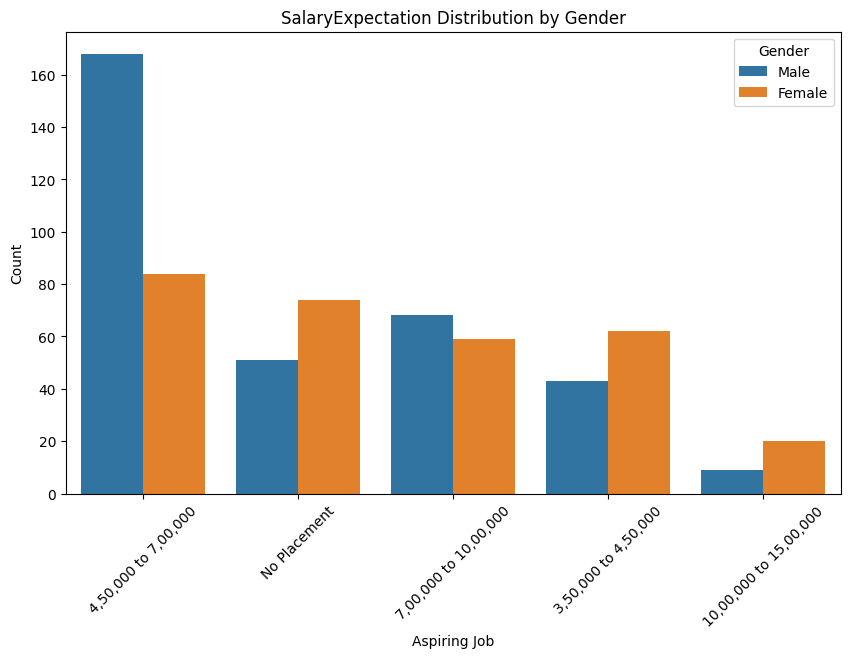

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SalaryExpectation', hue='Gender')
plt.xlabel('Aspiring Job')
plt.ylabel('Count')
plt.title('SalaryExpectation Distribution by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

## Age Distribution by Gender

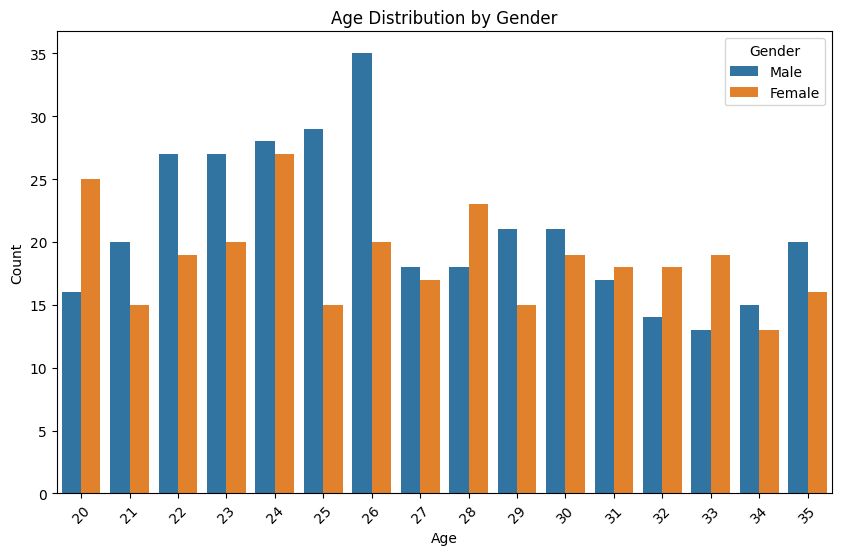

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<Figure size 1000x1000 with 0 Axes>

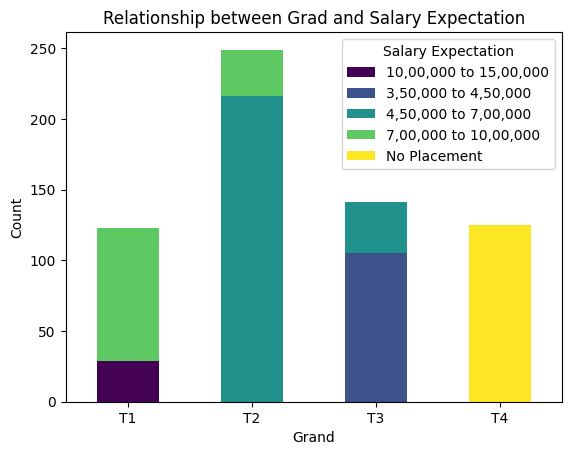

In [100]:
plt.figure(figsize=(10, 10))

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(data['Grand'], data['SalaryExpectation'])

# Plot a stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
ax.set_ylabel('Count')

plt.title('Relationship between Grad and Salary Expectation')
plt.xticks(rotation=0)
plt.legend(title='Salary Expectation')
plt.show()


<Figure size 800x1000 with 0 Axes>

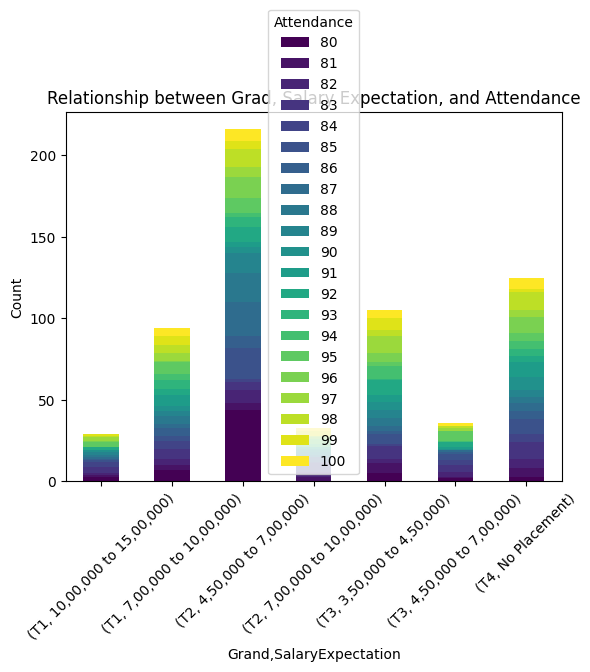

In [101]:
plt.figure(figsize=(8, 10))

# Create a cross-tabulation of the three columns
cross_tab = pd.crosstab([data['Grand'], data['SalaryExpectation']], data['Attendance'])

# Plot a stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
ax.set_ylabel('Count')

plt.title('Relationship between Grad, Salary Expectation, and Attendance')
plt.xticks(rotation=45)

plt.show()


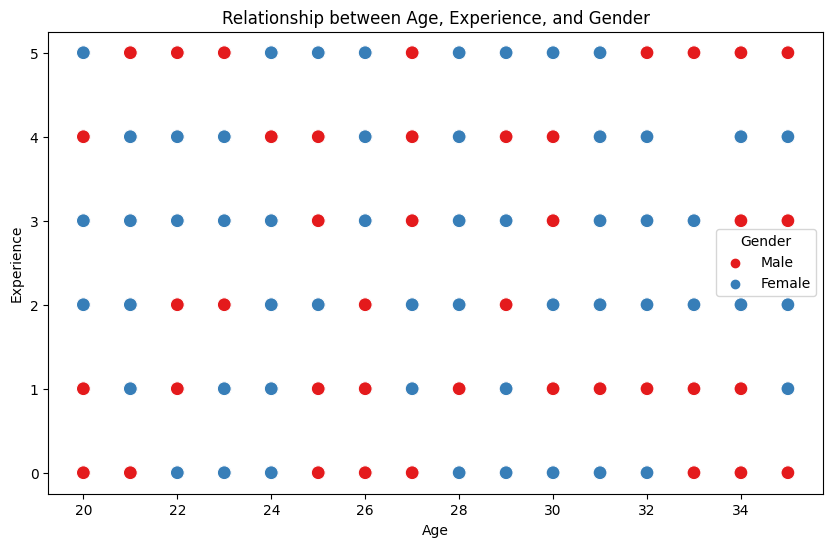

In [102]:
# Assuming you have a DataFrame named 'data'
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=data, x='Age', y='Experience', hue='Gender', palette='Set1', s=100)

plt.title('Relationship between Age, Experience, and Gender')
plt.legend(title='Gender')
plt.show()


C:\Users\mdine\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


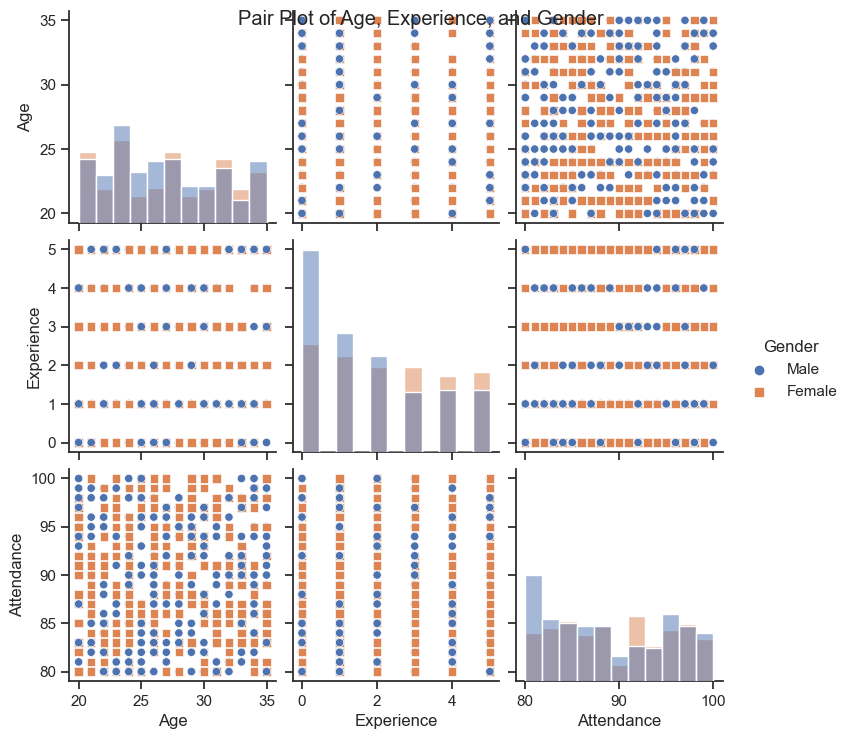

In [103]:
# Assuming you have a DataFrame named 'data'
sns.set(style="ticks")
g = sns.pairplot(data, hue="Gender", diag_kind="hist", markers=["o", "s"])

plt.suptitle('Pair Plot of Age, Experience, and Gender')
plt.show()


C:\Users\mdine\AppData\Local\Temp\ipykernel_18084\1305372954.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


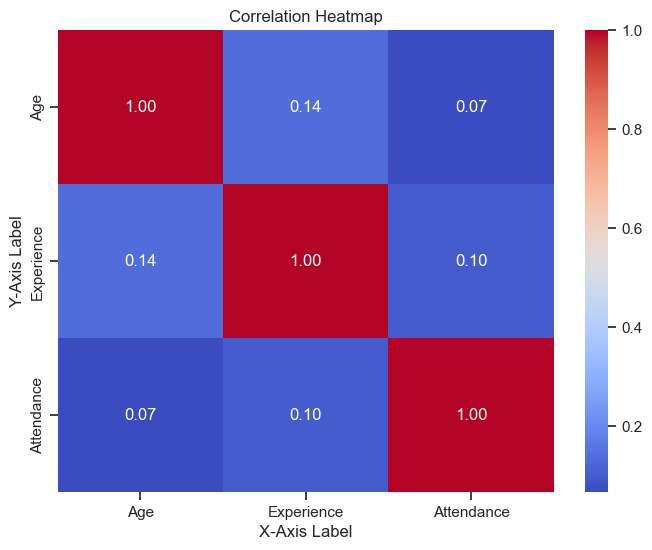

In [104]:
# Sample correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


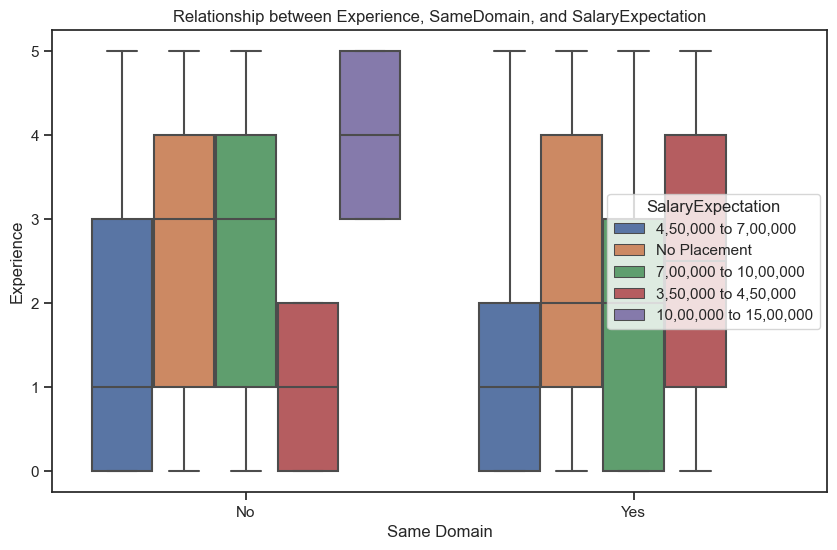

In [105]:
# Create a box plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x="SameDomain", y="Experience", hue="SalaryExpectation", data=data)

# Add labels and title
plt.xlabel("Same Domain")
plt.ylabel("Experience")
plt.title("Relationship between Experience, SameDomain, and SalaryExpectation")

# Show the plot
plt.show()


C:\Users\mdine\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


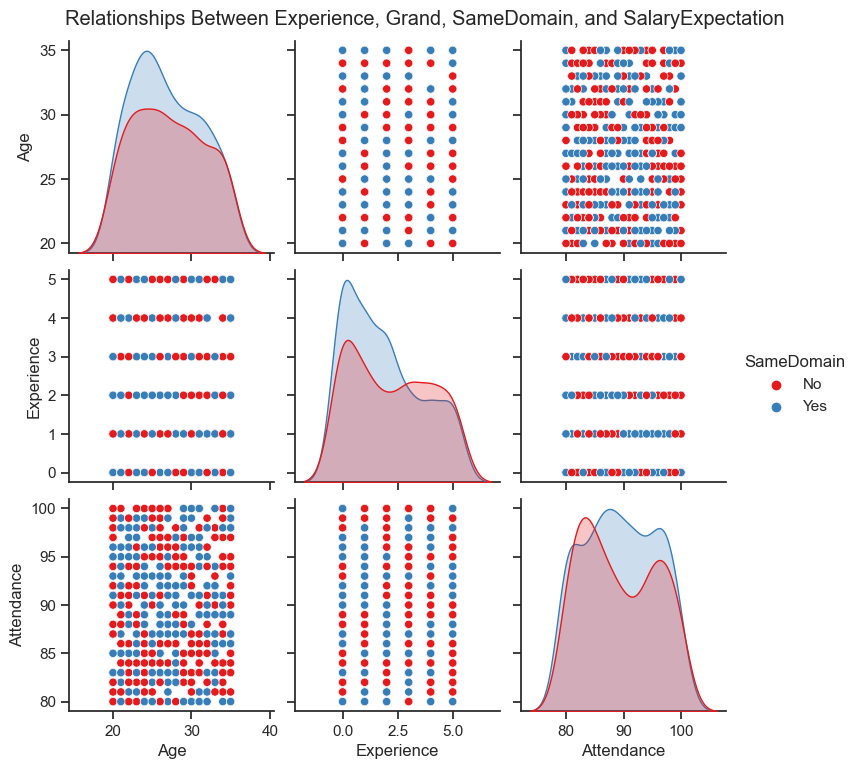

In [106]:

# Create a pair plot to visualize the relationships
sns.pairplot(data, hue="SameDomain", palette="Set1", diag_kind="kde")

# Add title
plt.suptitle("Relationships Between Experience, Grand, SameDomain, and SalaryExpectation", y=1.02)

# Show the plot
plt.show()


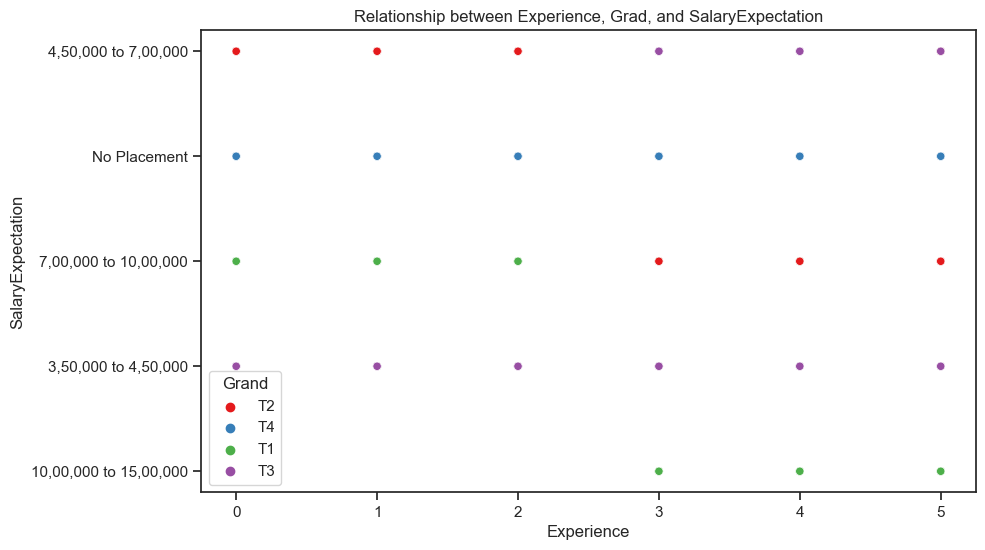

In [107]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Experience", y="SalaryExpectation", hue="Grand", palette="Set1")

# Add labels and title
plt.xlabel("Experience")
plt.ylabel("SalaryExpectation")
plt.title("Relationship between Experience, Grad, and SalaryExpectation")

# Show the plot
plt.show()


# Here are some insights from my project that I have collected:

**1) In Imarticus, there is a higher number of people in the 24 and 25 age group.**

**2) In Imarticus, there are more males compared to females.**

**3) At Imarticus, a higher number of students come from a Master's in Business Administration (MBA) background as compared to   those pursuing a Master of Science (MSc) in Chemistry.**

**4) At Imarticus, a larger number of students have a proficiency in Computer Science, whereas the number of students with proficiency in Teaching is lower.**

**5) In Imarticus, there are more students who are freshers, and there are fewer students with 5 years of experience.**

**6) In Imarticus, the number of single individuals is higher compared to those who are married or divorced.**

**7) In Imarticus, there are more single males, while there are more single and divorced females.**

**8) In Imarticus, a larger number of students are interested in pursuing roles as Data Analysts, while only a few students are interested in roles as Investment Banking Associates.**

**9) In Imarticus, a significant number of students come from a similar background and have enrolled in courses related to their background or field of study.**

**10) In Imarticus, a majority of students are enrolling in courses within their existing domain, but there are a few students who have changed their domain, primarily with the aim of career progression.**

**11) In Imarticus, the majority of students receive a T2 grade, while only a few students receive a T1 grade.**

**12) In Imarticus, a larger number of students enroll in the Post Graduate Diploma in Accounting (PGDA) and Investment Banking courses compared to other available courses.**

**13) In Imarticus, the majority of students expect a salary range of 4.5 to 7 lakhs, while only a small number of students expect a higher salary range of 10 to 15 lakhs, which is often based on their level of experience.**

**14)job In Imarticus, a significant number of both male and female candidates aspire to pursue a career as Data Analysts, while there are very few female candidates interested in the role of Investment Banking Associate.**

## 7.Data Transformation and Feature Engineering:

Data Transformation:

Convert categorical variables into numerical format (e.g., one-hot encoding or label encoding) if needed for modeling.
Scale or normalize numerical features to ensure they have similar scales.


Feature Engineering:

Create new features that might be more informative for the problem you're trying to solve.
Select relevant features and remove irrelevant ones.


In [108]:
data.head()

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation
0,Harikrishna,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
2,Dinesh,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
4,Jeeva S,25,Male,Masters in Business Administration,Accounts,0,Single,Bengaluru,Data Analyst,Yes,Interest in Other Domain,93,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
5,Meghana,22,Female,Bachelors of Engineering,Civil Engineering,0,Single,Bengaluru,others,Yes,Salary,92,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"
6,Iftekhar Ahmed Khan,23,Male,Bachelors of Engineering,Mechanical Engineering,0,Single,Bengaluru,Data Engineer,Yes,Career Progression,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000"


In [109]:
data.SalaryExpectation.unique()

array(['4,50,000 to 7,00,000', 'No Placement', '7,00,000 to 10,00,000',
       '3,50,000 to 4,50,000', '10,00,000 to 15,00,000'], dtype=object)

In [110]:
# Define a dictionary for mapping similar values
mapping = {
    'No Placement': 0,
    '3,50,000 to 4,50,000': 1,
    '4,50,000 to 7,00,000': 2,
    '7,00,000 to 10,00,000':3,
    '10,00,000 to 15,00,000':4
}
data['Salary']=data['SalaryExpectation'].replace(mapping)

In [111]:
data.head()

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,SalaryExpectation,Salary
0,Harikrishna,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Analyst,No,Not changed I am in my domain,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000",2
2,Dinesh,24,Male,Bachelors in Technology,Computer Science,0,Single,Bengaluru,Data Scientist,No,Not changed I am in my domain,100,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000",2
4,Jeeva S,25,Male,Masters in Business Administration,Accounts,0,Single,Bengaluru,Data Analyst,Yes,Interest in Other Domain,93,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000",2
5,Meghana,22,Female,Bachelors of Engineering,Civil Engineering,0,Single,Bengaluru,others,Yes,Salary,92,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000",2
6,Iftekhar Ahmed Khan,23,Male,Bachelors of Engineering,Mechanical Engineering,0,Single,Bengaluru,Data Engineer,Yes,Career Progression,88,T2,Postgraduate Program in Data Science and Analy...,"4,50,000 to 7,00,000",2


In [112]:
data.drop(['SalaryExpectation'],axis=1,inplace=True)

In [113]:
data.columns

Index(['Name', 'Age', 'Gender', 'Graduation', 'Proficiency', 'Experience',
       'MaritalStatus', 'City', 'AspiringJobRole', 'SameDomain',
       'whyChangedDomain', 'Attendance', 'Grand', 'UpskillingCourse',
       'Salary'],
      dtype='object')

In [114]:
data.Gender.unique()   #data['Experience'] = data['Experience'].astype(int)

array(['Male', 'Female'], dtype=object)

In [115]:
# Define a dictionary for mapping similar values
mapping = {
    'Male': 0,
    'Female': 1
}
data['Gender']=data['Gender'].replace(mapping)

In [116]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [117]:
# Define a dictionary for mapping similar values
mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced':2
}
data['MaritalStatus']=data['MaritalStatus'].replace(mapping)
data['MaritalStatus'] = data['MaritalStatus'].astype(int)

In [118]:
data.SameDomain.unique()

array(['No', 'Yes'], dtype=object)

In [119]:
# Define a dictionary for mapping similar values
mapping = {
    'Yes': 0,
    'No': 1
}
data['SameDomain']=data['SameDomain'].replace(mapping)

In [120]:
data.Grand.unique()

array(['T2', 'T4', 'T1', 'T3'], dtype=object)

In [121]:
# Define a dictionary for mapping similar values
mapping = {
    'T1': 0,
    'T2': 1,
    'T3':2,
    'T4':3
}
data['Grand']=data['Grand'].replace(mapping)
data['Grand'] = data['Grand'].astype(int)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              638 non-null    object
 1   Age               638 non-null    int32 
 2   Gender            638 non-null    int64 
 3   Graduation        638 non-null    object
 4   Proficiency       638 non-null    object
 5   Experience        638 non-null    int32 
 6   MaritalStatus     638 non-null    int32 
 7   City              638 non-null    object
 8   AspiringJobRole   638 non-null    object
 9   SameDomain        638 non-null    int64 
 10  whyChangedDomain  638 non-null    object
 11  Attendance        638 non-null    int64 
 12  Grand             638 non-null    int32 
 13  UpskillingCourse  638 non-null    object
 14  Salary            638 non-null    int64 
dtypes: int32(4), int64(4), object(7)
memory usage: 69.8+ KB


## Label encoding

In [123]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [124]:
data['Graduation']=LE.fit_transform(data['Graduation'])
data['Proficiency']=LE.fit_transform(data['Proficiency'])
data['City']=LE.fit_transform(data['City'])
data['AspiringJobRole']=LE.fit_transform(data['AspiringJobRole'])
data['whyChangedDomain']=LE.fit_transform(data['whyChangedDomain'])
data['UpskillingCourse']=LE.fit_transform(data['UpskillingCourse'])

In [125]:
data.head()

,Name,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,Salary
0,Harikrishna,24,0,3,4,0,0,0,2,1,3,88,1,4,2
2,Dinesh,24,0,3,4,0,0,0,4,1,3,100,1,4,2
4,Jeeva S,25,0,8,0,0,0,0,2,0,2,93,1,4,2
5,Meghana,22,1,4,3,0,0,0,8,0,4,92,1,4,2
6,Iftekhar Ahmed Khan,23,0,4,9,0,0,0,3,0,0,88,1,4,2


In [126]:
data.describe()

,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse,Salary
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,26.978056,0.468652,4.536050,5.534483,2.010972,0.860502,1.995298,3.371473,0.454545,2.227273,89.340125,1.420063,2.369906,1.733542
std,4.452733,0.499408,2.782732,4.093250,1.742859,0.825976,1.803966,2.237458,0.498320,1.392988,6.299833,1.011258,1.794244,1.122555
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,84.000000,1.000000,1.000000,1.000000
50%,26.000000,0.000000,4.000000,4.500000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,89.000000,1.000000,2.000000,2.000000
75%,31.000000,1.000000,7.000000,9.000000,3.000000,2.000000,4.000000,5.000000,1.000000,3.000000,95.000000,2.000000,4.000000,2.000000
max,35.000000,1.000000,9.000000,14.000000,5.000000,2.000000,5.000000,8.000000,1.000000,4.000000,100.000000,3.000000,5.000000,4.000000


# Now i will be backuping the data

In [127]:
data_backup = data.copy(deep=True)

# 8.Data Splitting:

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
# Separate object for target feature 
y= data['Salary']

# Separate object for Predictors 
X = data.drop(['Name','Salary'],axis=1)

In [130]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (638, 13), Dependent Features Shape = (638,)


In [131]:
X.describe()

,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,26.978056,0.468652,4.536050,5.534483,2.010972,0.860502,1.995298,3.371473,0.454545,2.227273,89.340125,1.420063,2.369906
std,4.452733,0.499408,2.782732,4.093250,1.742859,0.825976,1.803966,2.237458,0.498320,1.392988,6.299833,1.011258,1.794244
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
25%,23.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,84.000000,1.000000,1.000000
50%,26.000000,0.000000,4.000000,4.500000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,89.000000,1.000000,2.000000
75%,31.000000,1.000000,7.000000,9.000000,3.000000,2.000000,4.000000,5.000000,1.000000,3.000000,95.000000,2.000000,4.000000
max,35.000000,1.000000,9.000000,14.000000,5.000000,2.000000,5.000000,8.000000,1.000000,4.000000,100.000000,3.000000,5.000000


In [132]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [133]:
X.describe()

,Age,Gender,Graduation,Proficiency,Experience,MaritalStatus,City,AspiringJobRole,SameDomain,whyChangedDomain,Attendance,Grand,UpskillingCourse
count,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02
mean,2.672888e-16,-8.909627e-17,6.682220e-17,2.088194e-17,-4.454813e-17,-2.227407e-17,-4.454813e-17,2.227407e-17,1.113703e-17,1.336444e-16,6.515165e-16,5.568517e-18,6.682220e-17
std,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00,1.000785e+00
min,-1.568370e+00,-9.391517e-01,-1.631350e+00,-1.353161e+00,-1.154741e+00,-1.042617e+00,-1.106929e+00,-1.508014e+00,-9.128709e-01,-1.600171e+00,-1.483762e+00,-1.405356e+00,-1.321874e+00
25%,-8.940975e-01,-9.391517e-01,-9.120678e-01,-8.641681e-01,-1.154741e+00,-1.042617e+00,-1.106929e+00,-6.134415e-01,-9.128709e-01,-1.632828e-01,-8.483265e-01,-4.157123e-01,-7.640993e-01
50%,-2.198254e-01,-9.391517e-01,-1.927856e-01,-2.529272e-01,-6.300222e-03,1.690217e-01,2.608632e-03,-1.661550e-01,-9.128709e-01,5.551615e-01,-5.403195e-02,-4.157123e-01,-2.063243e-01
75%,9.039615e-01,1.064791e+00,8.861375e-01,8.473063e-01,5.679200e-01,1.380660e+00,1.112147e+00,7.284179e-01,1.095445e+00,5.551615e-01,8.991215e-01,5.739311e-01,9.092257e-01
max,1.802991e+00,1.064791e+00,1.605420e+00,2.069788e+00,1.716360e+00,1.380660e+00,1.666916e+00,2.070277e+00,1.095445e+00,1.273606e+00,1.693416e+00,1.563575e+00,1.467001e+00


## Splitting the data into Training data and Test data

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [135]:
print("X data=",X.shape, X_train.shape,X_test.shape,"\n")
print("y data=",y.shape,y_train.shape,y_test.shape)

X data= (638, 13) (510, 13) (128, 13) 

y data= (638,) (510,) (128,)


# 9.Handling Imbalanced Data:

## SMOTE Techniques

In [136]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

# Build the Logistic regression Algorithm

In [137]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [138]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [139]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 97.46192893401016
Test Accuracy 95.3125


In [140]:
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  1 52  2  0]
 [ 0  0  0 24  3]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.97        55
           3       0.92      0.89      0.91        27
           4       0.40      1.00      0.57         2

    accuracy                           0.95       128
   macro avg       0.85      0.97      0.88       128
weighted avg       0.97      0.95      0.96       128



**In the logistic regression model, the training accuracy is 97.46%, while the test accuracy is 95.31%. These results indicate that the model's performance is good**

# DecisionTree Algorithm

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 100.0 

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         2

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



**The Decision Tree model has a remarkable Training and Testing accuracy of 100% but shows a lower test accuracy of 100%.**

# RandomForest model

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 100.0 

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         2

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



**The Random Forest model has a remarkable training and accuracy of 100% but shows a lower test accuracy of 100%.**

# K-Nearest Neighbors (KNN)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 89.84771573604061 

Test Accuracy:- 61.71875 

confusion_matrix:- 
 [[18  8  0  1  0]
 [ 8  5  3  1  0]
 [ 3  5 38  8  1]
 [ 0  2  4 16  5]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.25      0.29      0.27        17
           2       0.84      0.69      0.76        55
           3       0.62      0.59      0.60        27
           4       0.25      1.00      0.40         2

    accuracy                           0.62       128
   macro avg       0.52      0.65      0.54       128
weighted avg       0.66      0.62      0.63       128



 **The K-Nearest Neighbors (KNN) model achieved a training accuracy of 89.84% but exhibited a lower test accuracy of 61.71%. This indicates that the model may have difficulty generalizing to new, unseen data.**

# SVM(Support Vector Machine)

In [146]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 98.4375 

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 16  1  0  0]
 [ 0  0 54  1  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.94      0.97        17
           2       0.98      0.98      0.98        55
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00         2

    accuracy                           0.98       128
   macro avg       0.99      0.98      0.99       128
weighted avg       0.98      0.98      0.98       128



 **The K-Nearest Neighbors (KNN) model achieved a training accuracy of 100% and  test accuracy of 98.43%. This indicates that the model Perfomed well**

# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [147]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 99.39086294416244
Test Accuracy: 97.65625
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 54  1  0]
 [ 0  0  0 25  2]
 [ 0  0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        17
           2       1.00      0.98      0.99        55
           3       0.96      0.93      0.94        27
           4       0.50      1.00      0.67         2

    accuracy                           0.98       128
   macro avg       0.89      0.98      0.92       128
weighted avg       0.98      0.98      0.98       128



Kernel: rbf
Train Accuracy: 100.0
Test Accuracy: 98.4375
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 16  1  0  0]
 [ 0  0 54  1  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
  

In my SVM experiments, you used multiple kernels:

1. **Linear Kernel:**
   - Training Accuracy: 99.39%
   - Test Accuracy: 97.65%

2. **RBF Kernel (Radial Basis Function):**
   - Training Accuracy: 100%
   - Test Accuracy: 98.43%

3. **Polynomial Kernel:**
   - Training Accuracy: 99.28%
   - Test Accuracy: 89.84%

4. **Sigmoid Kernel:**
   - Training Accuracy: 81.82%
   - Test Accuracy: 86.71%

Among these kernels, the RBF kernel performs the best on both the training and test sets, indicating better generalization compared to the others. However, there's still room for improvement in terms of test accuracy for all kernels. Further hyperparameter tuning or feature engineering may be necessary to enhance model performance.

# Naive Bayes classifier

In [148]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 88.73096446700508 

Test Accuracy:- 89.0625 

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  5 48  2  0]
 [ 0  0  2 20  5]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.77      1.00      0.87        17
           2       0.96      0.87      0.91        55
           3       0.91      0.74      0.82        27
           4       0.29      1.00      0.44         2

    accuracy                           0.89       128
   macro avg       0.79      0.92      0.81       128
weighted avg       0.92      0.89      0.90       128



**In the Naive Bayes model, the training accuracy is 88.73%, while the test accuracy is 89.06%. These results suggest that the model may struggle to generalize to new, unseen data.** 

# AdaBoostClassifier, GradientBoostingClassifier

In [149]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 54.61928934010152
Test Accuracy: 79.6875
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0 55  0  0]
 [ 0  0  7 20  0]
 [ 0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.00      0.00      0.00        17
           2       0.70      1.00      0.82        55
           3       0.91      0.74      0.82        27
           4       0.00      0.00      0.00         2

    accuracy                           0.80       128
   macro avg       0.52      0.55      0.53       128
weighted avg       0.70      0.80      0.74       128



Classifier: GradientBoosting
Train Accuracy: 100.0
Test Accuracy: 100.0
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00   

C:\Users\mdine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In my boosting experiments:

1. **AdaBoostClassifier:**
   - Training Accuracy:54.61%
   - Test Accuracy: 79.68%

2. **GradientBoosting:**
   - Training Accuracy: 100%
   - Test Accuracy: 100%

The GradientBoosting model outperforms AdaBoostClassifier in terms of both training and test accuracy, indicating better predictive power and generalization. It's important to note that boosting techniques like Gradient Boosting often yield stronger performance but may require more computational resources and hyperparameter tuning.

# (XGB)Extreme Gradient Boosting

In [150]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 100.0 

confusion_matrix:- 
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         2

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



**The XGBoost model exhibits strong performance with a training accuracy of 100% and a test accuracy of 100%. It demonstrates robust generalization, showcasing its effectiveness in predictive tasks with proper tuning and feature engineering.**

# Here is a summary of the performance of all the models in my project:

**1) The Logistic Regression model demonstrates strong performance with a training accuracy of 97.46% and a test accuracy of 95.31%. These results suggest that the model generalizes well to new, unseen data while maintaining a high level of accuracy.**

**2) The Decision Tree model exhibited a remarkable training accuracy of 100%; however, it showed a lower test accuracy of 100%, suggesting potential overfitting.**

**3) The Random Forest model achieved a 100% training accuracy and a 100% test accuracy, which is a rare and possibly concerning result, indicating potential overfitting.**

 **4) The K-Nearest Neighbors (KNN) model achieved a training accuracy of 89.84% but exhibited a lower test accuracy of 61.71%. This indicates that the model may have difficulty generalizing to new, unseen data.**

**5) The Support Vector Machine (SVM) model performed well with a 100% training accuracy and a 98% test accuracy, suggesting good generalization to new data.**

**6) In my SVM experiments, you used multiple kernels:**

1. **Linear Kernel:**
   - Training Accuracy: 99.39%
   - Test Accuracy: 97.65%

2. **RBF Kernel (Radial Basis Function):**
   - Training Accuracy: 100%
   - Test Accuracy: 98.43%

3. **Polynomial Kernel:**
   - Training Accuracy: 99.28%
   - Test Accuracy: 89.84%

4. **Sigmoid Kernel:**
   - Training Accuracy: 81.82%
   - Test Accuracy: 86.71%

Among these kernels, the RBF kernel performs the best on both the training and test sets, indicating better generalization compared to the others. However, there's still room for improvement in terms of test accuracy for all kernels. Further hyperparameter tuning or feature engineering may be necessary to enhance model performance.


**7) In the Naive Bayes model, the training accuracy is 88.73%, and the test accuracy is 89.06%. These results indicate that the model's performance is quite good, as it maintains a high level of accuracy on both the data it was trained on and new, unseen data.**

**8) In my boosting experiments:

1. **AdaBoostClassifier:**
   - Training Accuracy:54.61%
   - Test Accuracy: 79.68%

2. **GradientBoosting:**
   - Training Accuracy: 100%
   - Test Accuracy: 100%

The GradientBoosting model outperforms AdaBoostClassifier in terms of both training and test accuracy, indicating better predictive power and generalization. It's important to note that boosting techniques like Gradient Boosting often yield stronger performance but may require more computational resources and hyperparameter tuning.

**9)(XGB)Extreme Gradient Boosting  model exhibited a remarkable training accuracy of 100%; however, it showed a lower test accuracy of 100%, suggesting potential overfitting.**


# Taking the next step to determine the best model's performance:

**Among these models, 1) the SVM RBF Kernel (Radial Basis Function) model appears to be the most promising due to its high test accuracy and balanced performance between training and testing data.**

**2) I want to further explore Random Forest to assess its potential for achieving high performance.**

# Feature Selection Technique

In [151]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [152]:
print(selection.feature_importances_)

[6.43564436e-05 1.11716562e-04 1.40686417e-04 7.83563641e-06
 5.77643877e-02 1.52427065e-05 4.84058824e-04 1.83988420e-05
 3.79666267e-02 0.00000000e+00 6.39827624e-05 9.03329505e-01
 3.32021415e-05]


In [153]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

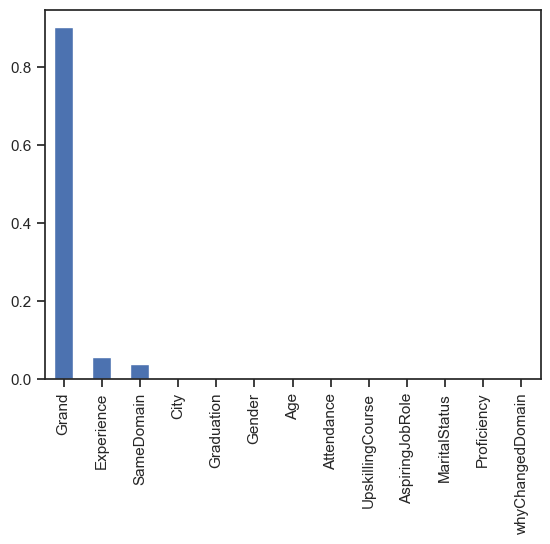

In [154]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [155]:
X_imp = X[feat_importances.nlargest(3).index]
X_imp

,Grand,Experience,SameDomain
0,-0.415712,-1.154741,1.095445
1,-0.415712,-1.154741,1.095445
2,-0.415712,-1.154741,-0.912871
3,-0.415712,-1.154741,-0.912871
4,-0.415712,-1.154741,-0.912871
...,...,...,...
633,-1.405356,-0.580520,1.095445
634,1.563575,0.567920,1.095445
635,0.573931,1.142140,-0.912871
636,-0.415712,-0.580520,1.095445


In [156]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [157]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 100.0 

confusion_matrix:- 
 [[ 98   0   0   0   0]
 [  0  88   0   0   0]
 [  0   0 197   0   0]
 [  0   0   0 100   0]
 [  0   0   0   0  27]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00       197
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00        27

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



# hyperparameters

In [158]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [159]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [160]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [161]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [162]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [163]:
RF = RandomForestClassifier(n_estimators = 100,min_samples_split = 5,min_samples_leaf =5,max_features ='sqrt',max_depth = 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 100.0 

confusion_matrix:- 
 [[ 98   0   0   0   0]
 [  0  88   0   0   0]
 [  0   0 197   0   0]
 [  0   0   0 100   0]
 [  0   0   0   0  27]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00       197
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00        27

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



# Parameter Tuning for SVM

In [164]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters and their possible values specific to the RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    #'kernal':['linear','rbf','poly','sigmoid']
}

# Create the SVM classifier with the RBF kernel
SVM = SVC(kernel='rbf')

# Create a RandomizedSearchCV object
svm_model = RandomizedSearchCV(SVM, param_distributions=param_grid, cv=4, random_state=0, n_iter=20)

# Perform the randomized search on the training data
svm_model.fit(X_train, y_train)

C:\Users\mdine\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1]},
                   random_state=0)

In [165]:
# Get the best hyperparameters from the search
best_params = svm_model.best_params_

# Train a new SVM classifier with the best hyperparameters for the RBF kernel
best_SVM = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_SVM.fit(X_train, y_train)

# Make predictions with the tuned RBF model
y_train_pred = best_SVM.predict(X_train)
y_test_pred = best_SVM.predict(X_test)

# Evaluate the tuned RBF model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters for RBF Kernel:", best_params)
print("Train Accuracy with RBF Kernel: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy with RBF Kernel: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix with RBF Kernel:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report with RBF Kernel:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters for RBF Kernel: {'gamma': 1, 'C': 1}
Train Accuracy with RBF Kernel: 100.00%
Test Accuracy with RBF Kernel: 100.00%
Confusion Matrix with RBF Kernel:
 [[27  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0  2]]
Classification Report with RBF Kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         2

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [176]:
models = ["Logistic Train","Logistic Test", 'Decision Train','Decision Test', "KNN Train","KNN Test", "SVM Train","SVM Test", "SVM Linear Kernel Train","SVM Linear Kernel Test", 
          "SVM Polynomial Kernel Train","SVM Polynomial Kernel Test", "SVM Sigmoid Kernel Train","SVM Sigmoid Kernel Test"
          ]
accuracy_list = [97.46,95.31, 100,100, 89.84,61.75, 100,98.40, 99.39,97.65, 99.28,89.84, 81.82,86.71]

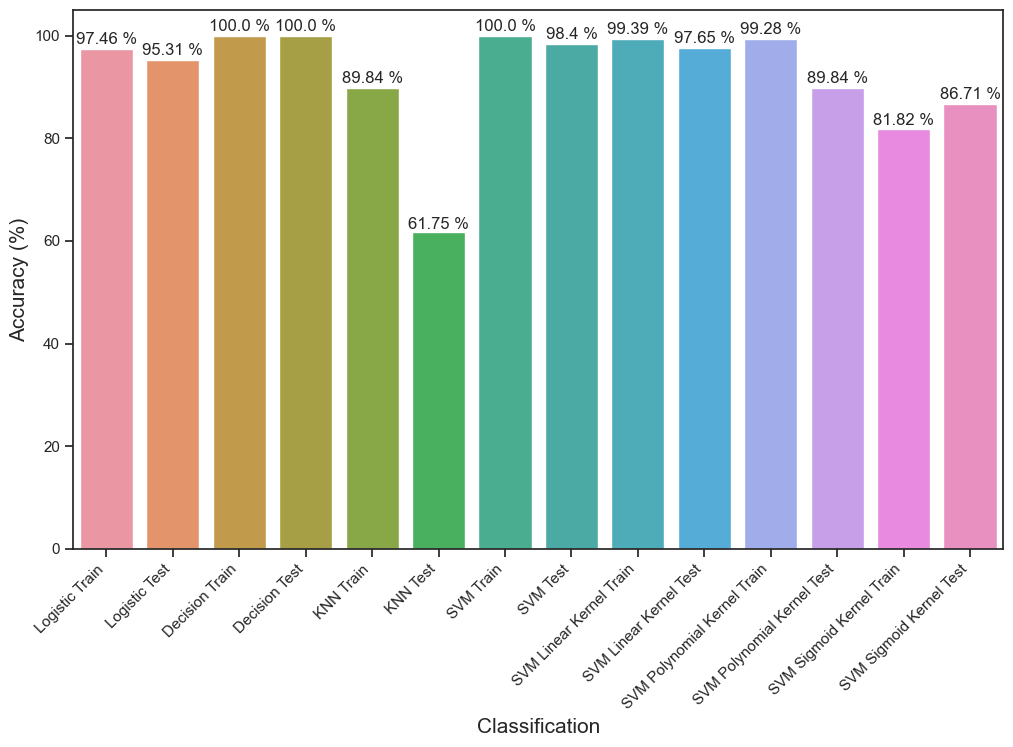

In [177]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(models, rotation=45, ha="right")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()


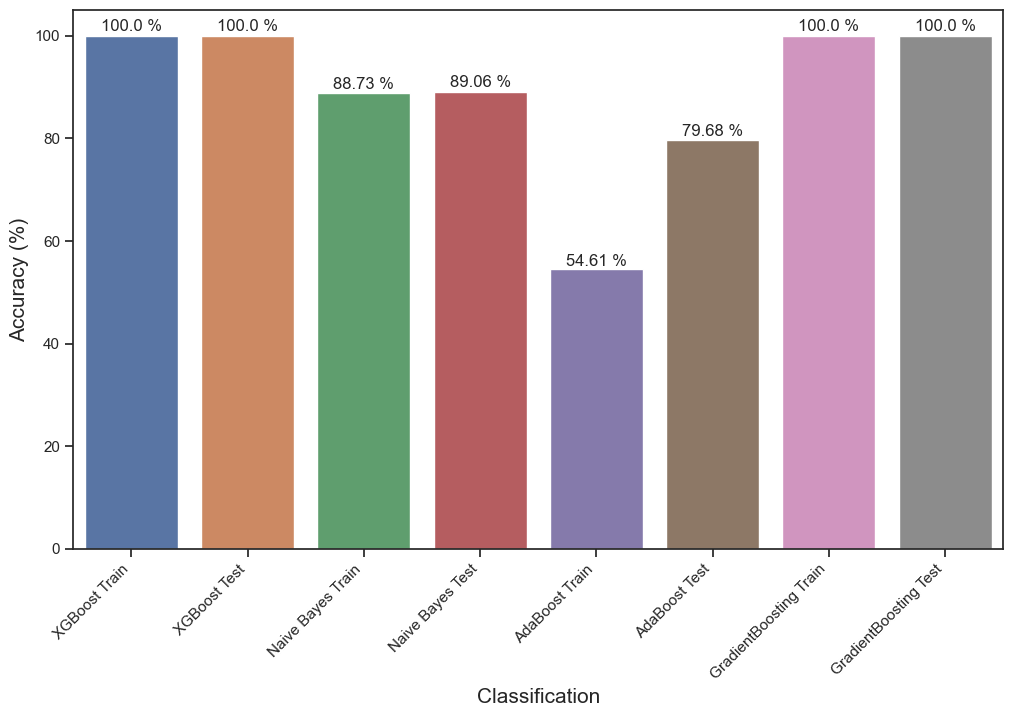

In [199]:
# Replace these with your actual model names and accuracy values
models =["XGBoost Train","XGBoost Test","Naive Bayes Train","Naive Bayes Test", "AdaBoost Train","AdaBoost Test", "GradientBoosting Train","GradientBoosting Test" ]
accuracy_list = [100,100, 88.73,89.06, 54.61,79.68, 100,100 ]

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Rotate x-axis labels by 45 degrees for readability
ax.set_xticklabels(models, rotation=45, ha="right")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()


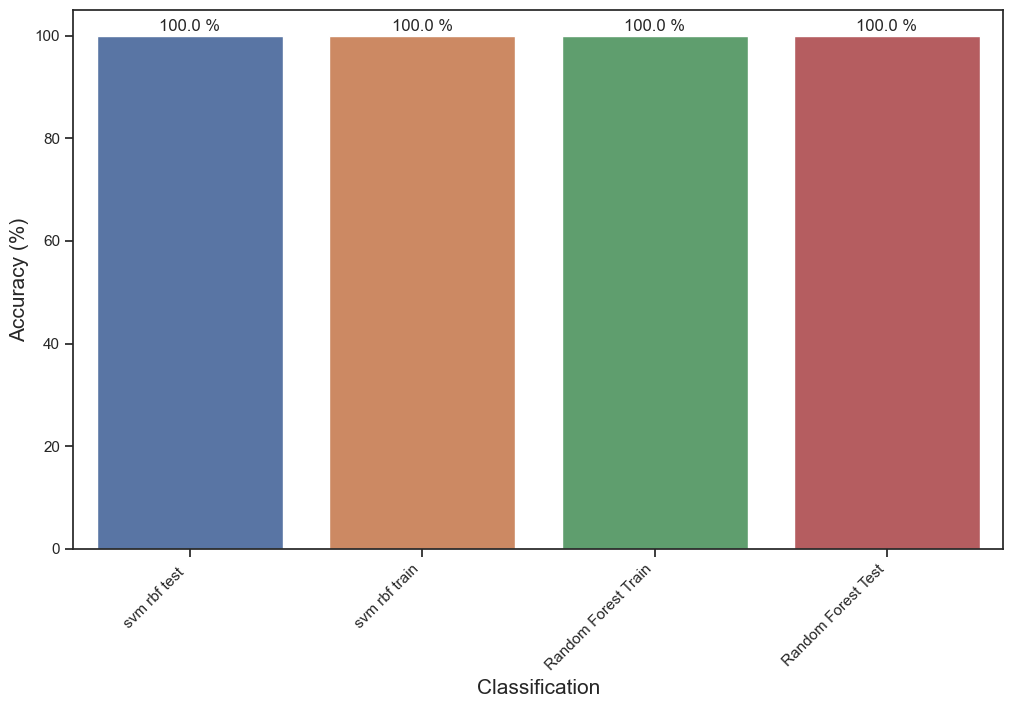

In [200]:
# Replace these with your actual model names and accuracy values
best_models =["svm rbf test ","svm rbf train", "Random Forest Train","Random Forest Test"]
best_accuracy_list = [100,100, 100,100]

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=best_models, y=best_accuracy_list)
plt.xlabel("Classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Rotate x-axis labels by 45 degrees for readability
ax.set_xticklabels(best_models, rotation=45, ha="right")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

# conclusion:-

**We can select any model and proceed with further steps.**